In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor

C:\Users\muniza.hashim\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Importing the Data 

In [3]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/muniza.hashim/Desktop/senior/FYP/FYP progress/House Prices/Preprocessing Data/Data.csv', encoding='utf-8')

In [14]:
corr_matrix = dataset.corr()
corr_matrix

,m2_price,square,rooms,micro_district,district,floor,floors,Day,Month,Year,Time,condition,building_type,price
m2_price,1.000000,-0.026278,0.002439,-0.010515,-0.067698,-0.094058,-0.054986,0.020060,-0.059884,0.060187,0.000436,0.125882,0.061062,0.425884
square,-0.026278,1.000000,0.769963,0.004323,0.019077,0.197395,0.268951,-0.005673,-0.028257,0.029056,0.014499,-0.072033,-0.161820,0.849680
rooms,0.002439,0.769963,1.000000,-0.009005,0.039455,0.054423,0.024225,-0.009853,-0.026837,0.027827,0.018304,-0.016581,-0.068525,0.677931
micro_district,-0.010515,0.004323,-0.009005,1.000000,0.018175,0.010658,0.021701,0.015138,-0.019011,0.019147,-0.008788,-0.002726,-0.035967,-0.003678
district,-0.067698,0.019077,0.039455,0.018175,1.000000,-0.000313,-0.055047,0.035111,-0.020709,0.020053,-0.012387,0.039165,-0.161037,-0.006160
floor,-0.094058,0.197395,0.054423,0.010658,-0.000313,1.000000,0.582426,-0.021081,0.023990,-0.023894,0.008983,-0.141874,-0.046356,0.136626
floors,-0.054986,0.268951,0.024225,0.021701,-0.055047,0.582426,1.000000,-0.018776,0.029025,-0.028359,0.018713,-0.195153,-0.056954,0.219076
Day,0.020060,-0.005673,-0.009853,0.015138,0.035111,-0.021081,-0.018776,1.000000,-0.139786,0.088138,-0.002278,-0.004756,-0.026435,0.004192
Month,-0.059884,-0.028257,-0.026837,-0.019011,-0.020709,0.023990,0.029025,-0.139786,1.000000,-0.997473,0.048283,-0.040563,0.034013,-0.047783
Year,0.060187,0.029056,0.027827,0.019147,0.020053,-0.023894,-0.028359,0.088138,-0.997473,1.000000,-0.048653,0.041500,-0.033607,0.048444


In [ ]:
dataset.head(3)

In [10]:
df_unique =print(dataset.drop_duplicates())

      m2_price  square  rooms  micro_district  district  floor  floors  Day  \
0          720     154      4              83         1     12      14    4   
1          740      77      2              83         1      5      12    4   
2          750      77      2              83         1      5      12    4   
4         1279      43      1              22         2      1      12    4   
5         1276      76      2              60         3     10      12    4   
...        ...     ...    ...             ...       ...    ...     ...  ...   
9974      1000     125      4              75         1     11      11   30   
9975       933      86      3              83         4      8       9   30   
9976      1108      65      2              88         3      9      11   30   
9977      1333     105      3             113         3     10      17   30   
9978       885      90      3              33         5      7      10   30   

      Month  Year  Time  condition  building_type  

In [11]:
num_duplicates_all = dataset.duplicated().sum()
num_duplicates_all

7

In [12]:
dataset.shape

(9979, 14)

In [7]:
dataset.columns

Index(['m2_price', 'square', 'rooms', 'micro_district', 'district', 'floor',
       'floors', 'Day', 'Month', 'Year', 'Time', 'condition', 'building_type',
       'price'],
      dtype='object')

### Dependent and Independent Variables 

In [7]:
# Splitting the dataset into independent (X) and dependent (y) variables
X = dataset.iloc[:, :-1].values  # Features
y = dataset.iloc[:, -1].values   # Target

### Splitting the dataset

In [8]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Decision Tree Regressor Model

In [9]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training the Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train, y_train)

# Making predictions on the Test set
y_pred = decision_tree_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print("Mean Absolute Error:", mae)
print("R-squared:", r2)  # This gives an indication of the goodness of fit 

#Before : Mean Absolute Error: 1212.821821821822, R-squared: 0.9853801437400991
#After : Mean Absolute Error: 1299.4724724724724, R-squared: 0.9785551083929039

Mean Absolute Error: 1194.9253507014027
R-squared: 0.9864624294511447


### Graphing the check the accuracy of  Decision Tree Regressor Model 

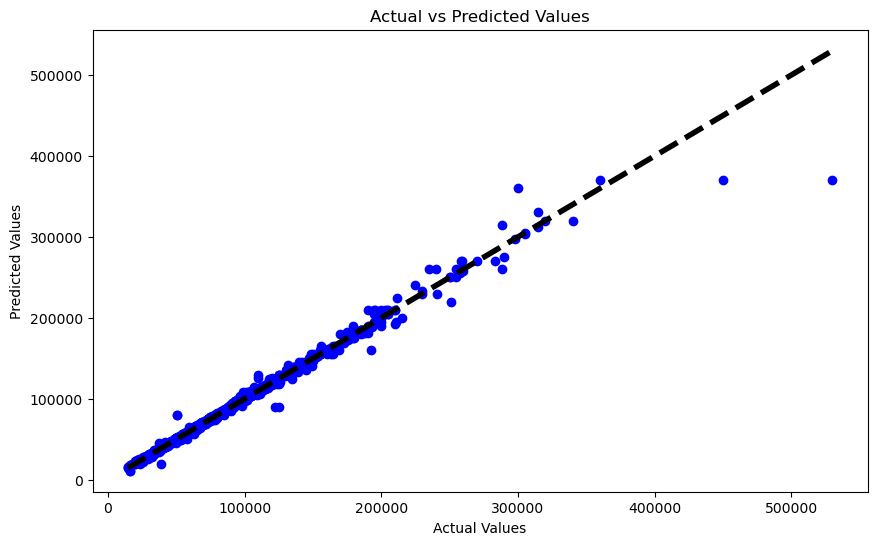

In [10]:
# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot of actual vs predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.show()

### Cross validation using DecisionTreeRegressor

In [11]:
# Initialize the model
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

# Perform cross-validation
scores = cross_val_score(decision_tree_regressor, X, y, cv=10, scoring='r2')  # cv is the number of folds; r2 for R-squared score

# Assuming scores is your array of R-squared scores
print("R-squared scores for each fold:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.4f}")  # Formats the score to 4 decimal places

# Printing the average R-squared score
average_score = scores.mean()
print(f"\nAverage R-squared across all folds: {average_score:.4f}")

#Before: Average R-squared across all folds: 0.9677
#After : Average R-squared across all folds: 0.9717


R-squared scores for each fold:
Fold 1: 0.9085
Fold 2: 0.9619
Fold 3: 0.9725
Fold 4: 0.9561
Fold 5: 0.9851
Fold 6: 0.9960
Fold 7: 0.9858
Fold 8: 0.9820
Fold 9: 0.9957
Fold 10: 0.9367

Average R-squared across all folds: 0.9680


### Visualizing the Cross-Validation Scores for DecisionTreeRegressor Model

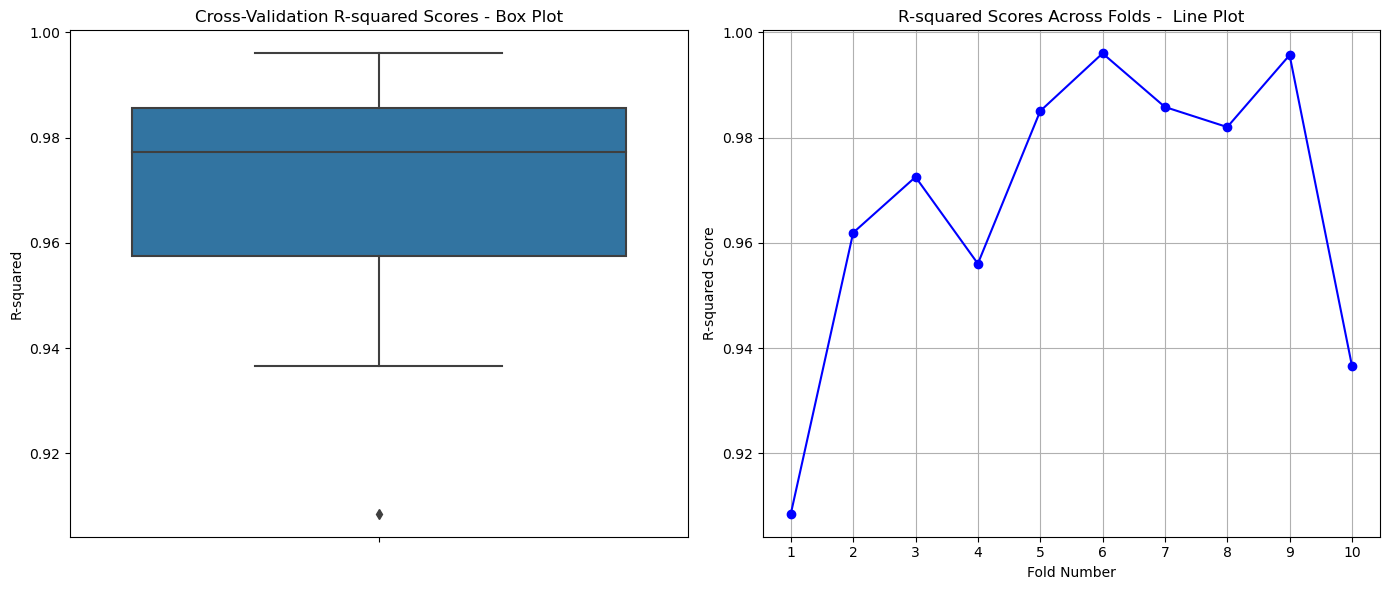

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Create a subplot for the box plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=scores)
plt.title('Cross-Validation R-squared Scores - Box Plot')
plt.ylabel('R-squared')

# Create a subplot for the line plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
plt.title('R-squared Scores Across Folds -  Line Plot')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.xticks(range(1, len(scores) + 1))
plt.grid(True)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

# 2. LinearRegression Model

In [266]:
# Initialize the model
linear_regression = LinearRegression()

# Fit the model to the training data
linear_regression.fit(X_train, y_train)

# Making predictions on the Test set
y_pred = linear_regression.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print("Mean Absolute Error:", mae)
print("R-squared:", r2)  # This gives an indication of the goodness of fit 


#Before: Mean Absolute Error: 5738.681928251177, R-squared: 0.9327702576286971
#After : Mean Absolute Error: 5745.430677411958, R-squared: 0.9325783377799781

Mean Absolute Error: 5745.430677411958
R-squared: 0.9325783377799781


### Graphing the check the accuracy of LinearRegression Model

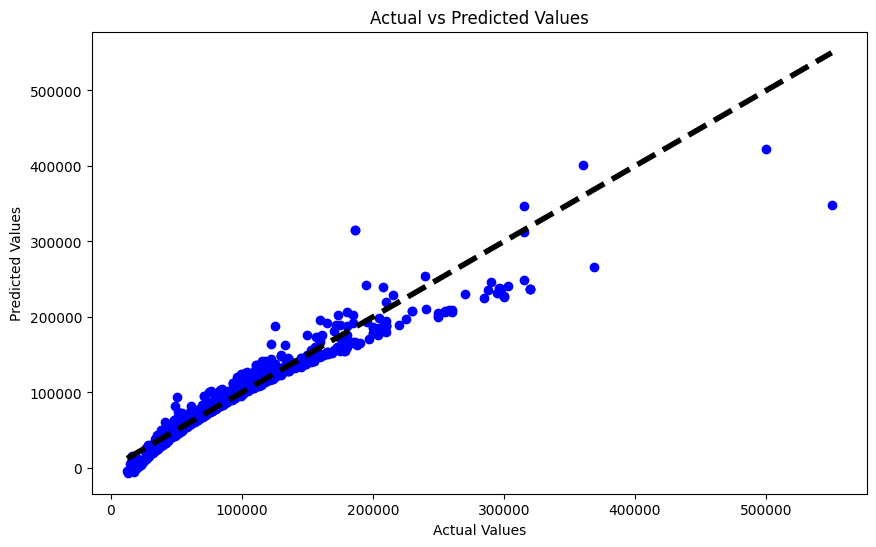

In [267]:
# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot of actual vs predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.show()

### Cross validation using LinearRegression Model

In [268]:
# Initialize the model
linear_regression = LinearRegression()

# Perform cross-validation
scores = cross_val_score(linear_regression, X, y, cv=10, scoring='r2')  # cv is the number of folds; r2 for R-squared score

# Print R-squared scores for each fold
print("R-squared scores for each fold:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.4f}")  # Formats the score to 4 decimal places

# Printing the average R-squared score
average_score = scores.mean()
print(f"\nAverage R-squared across all folds: {average_score:.4f}")

#Before : Average R-squared across all folds: 0.9207
#After : Average R-squared across all folds: 0.9206

R-squared scores for each fold:
Fold 1: 0.9486
Fold 2: 0.9481
Fold 3: 0.9474
Fold 4: 0.7223
Fold 5: 0.8840
Fold 6: 0.9398
Fold 7: 0.9349
Fold 8: 0.9608
Fold 9: 0.9603
Fold 10: 0.9597

Average R-squared across all folds: 0.9206


### Visualizing the Cross-Validation Scores for LinearRegression Model

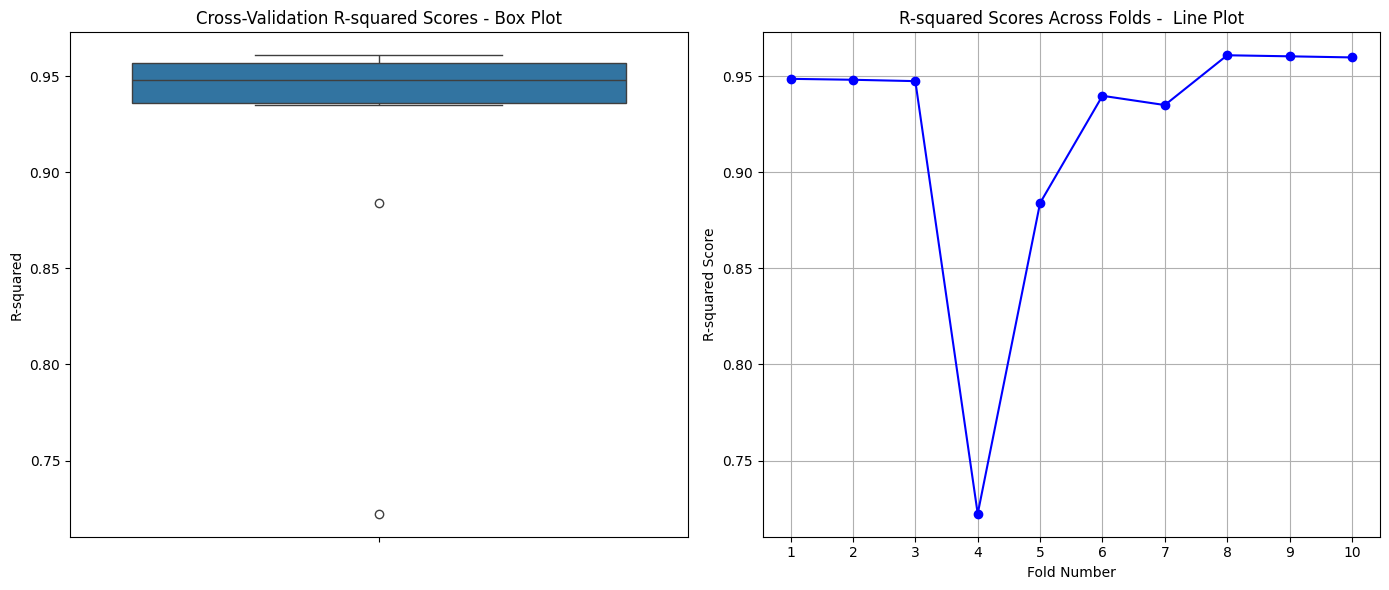

In [269]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Create a subplot for the box plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=scores)
plt.title('Cross-Validation R-squared Scores - Box Plot')
plt.ylabel('R-squared')

# Create a subplot for the line plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
plt.title('R-squared Scores Across Folds -  Line Plot')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.xticks(range(1, len(scores) + 1))
plt.grid(True)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()


# 3. RandomForest

In [271]:
# Initialize the model with n_estimators as the number of trees
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_regressor.fit(X_train, y_train)

# Making predictions on the Test set
y_pred = random_forest_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print("Mean Absolute Error:", mae)
print("R-squared:", r2)  # This gives an indication of the goodness of fit 

#Before : Mean Absolute Error: 681.6073473473474, R-squared: 0.9948904140248772
#After : Mean Absolute Error: 696.2393843843844, R-squared: 0.99379908165945

Mean Absolute Error: 696.2393843843844
R-squared: 0.99379908165945


### Graphing the check the accuracy of RandomForest

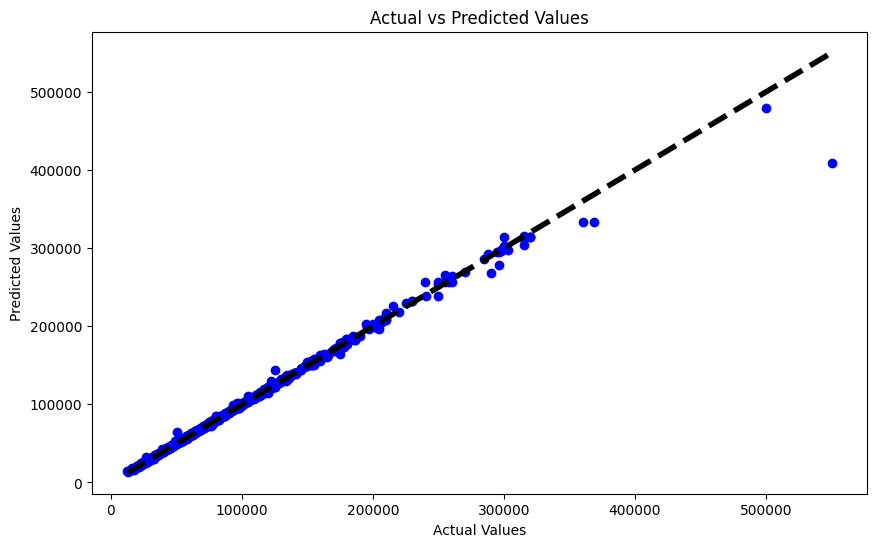

In [272]:
# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot of actual vs predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.show()

### Cross validation using RandomForest

In [273]:
# Initialize the model
random_forest_regressor = RandomForestRegressor()

# Perform cross-validation
scores = cross_val_score(random_forest_regressor, X, y, cv=10, scoring='r2')  # cv is the number of folds; r2 for R-squared score

# Print R-squared scores for each fold
print("R-squared scores for each fold:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.4f}")  # Formats the score to 4 decimal places

# Printing the average R-squared score
average_score = scores.mean()
print(f"\nAverage R-squared across all folds: {average_score:.4f}")

#Before : Average R-squared across all folds: 0.9822
#After : Average R-squared across all folds: 0.9813

R-squared scores for each fold:
Fold 1: 0.9192
Fold 2: 0.9872
Fold 3: 0.9977
Fold 4: 0.9856
Fold 5: 0.9811
Fold 6: 0.9980
Fold 7: 0.9824
Fold 8: 0.9752
Fold 9: 0.9976
Fold 10: 0.9886

Average R-squared across all folds: 0.9813


### Visualizing the Cross-Validation Scores for RandomForest

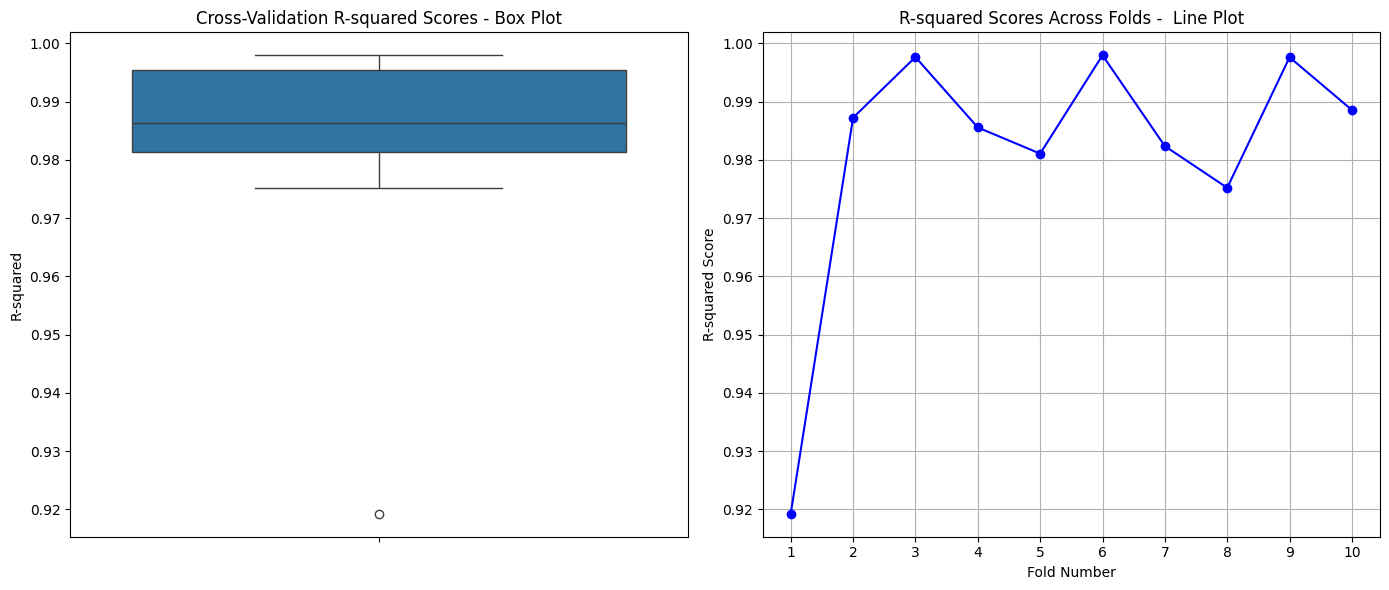

In [274]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Create a subplot for the box plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=scores)
plt.title('Cross-Validation R-squared Scores - Box Plot')
plt.ylabel('R-squared')

# Create a subplot for the line plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
plt.title('R-squared Scores Across Folds -  Line Plot')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.xticks(range(1, len(scores) + 1))
plt.grid(True)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()


# 4. GradientBoostingRegressor

In [275]:
# Initialize the model
gradient_boosting_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gradient_boosting_regressor.fit(X_train, y_train)

# Making predictions on the Test set
y_pred = gradient_boosting_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print("Mean Absolute Error:", mae)
print("R-squared:", r2)  # This gives an indication of the goodness of fit 

Mean Absolute Error: 1646.088640589654
R-squared: 0.9948710323472905


### Graphing the check the accuracy of GradientBoostingRegressor

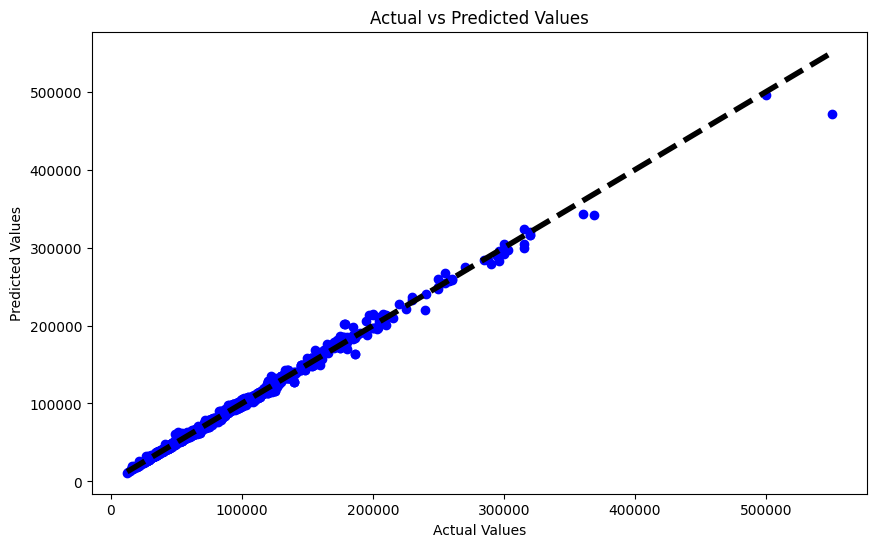

In [276]:
# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot of actual vs predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.show()

### Cross validation using GradientBoostingRegressor

In [277]:
# Initialize the model
gradient_boosting_regressor = GradientBoostingRegressor()
# Perform cross-validation
scores = cross_val_score(gradient_boosting_regressor, X, y, cv=10, scoring='r2')  # cv is the number of folds; r2 for R-squared score

# Print R-squared scores for each fold
print("R-squared scores for each fold:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.4f}")  # Formats the score to 4 decimal places

# Printing the average R-squared score
average_score = scores.mean()
print(f"\nAverage R-squared across all folds: {average_score:.4f}")

R-squared scores for each fold:
Fold 1: 0.9305
Fold 2: 0.9918
Fold 3: 0.9965
Fold 4: 0.9314
Fold 5: 0.9919
Fold 6: 0.9966
Fold 7: 0.9945
Fold 8: 0.9851
Fold 9: 0.9956
Fold 10: 0.9888

Average R-squared across all folds: 0.9803


### Visualizing the Cross-Validation Scores for GradientBoostingRegressor

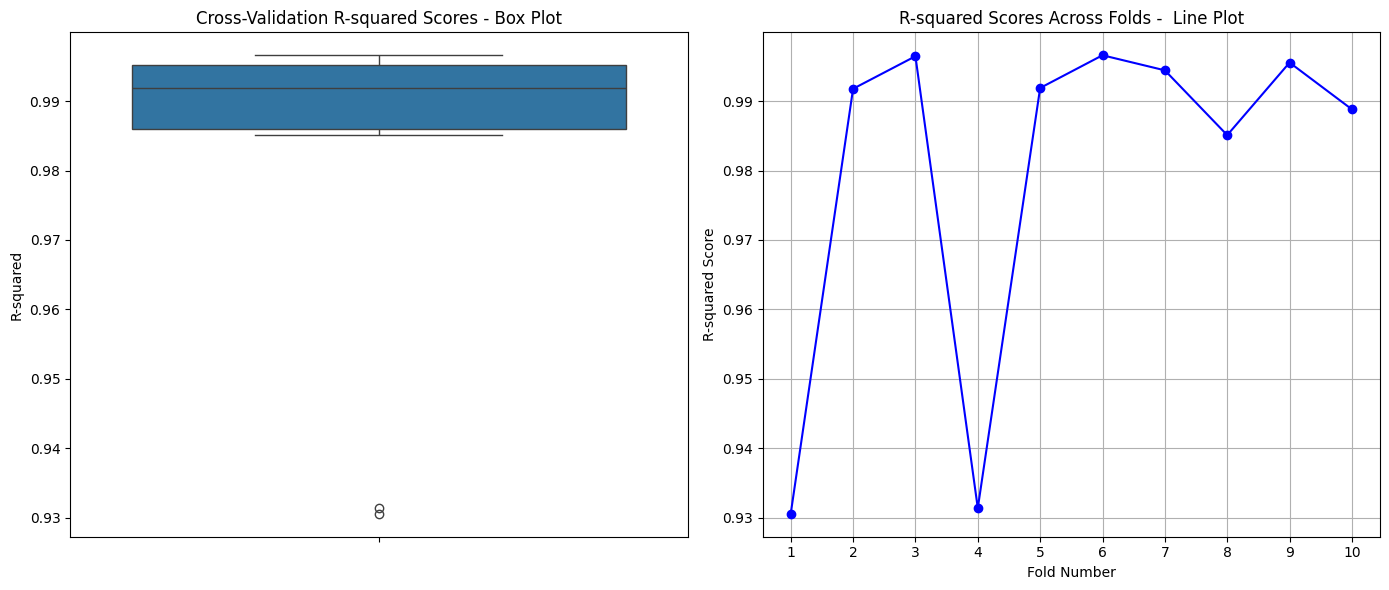

In [278]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Create a subplot for the box plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=scores)
plt.title('Cross-Validation R-squared Scores - Box Plot')
plt.ylabel('R-squared')

# Create a subplot for the line plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
plt.title('R-squared Scores Across Folds -  Line Plot')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.xticks(range(1, len(scores) + 1))
plt.grid(True)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()


# 5. LightGBMRegressor

In [279]:
# Initialize the model
lgb_regressor = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
lgb_regressor.fit(X_train, y_train)


# Making predictions on the Test set
y_pred = lgb_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print("Mean Absolute Error:", mae)
print("R-squared:", r2)  # This gives an indication of the goodness of fit 


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 711
[LightGBM] [Info] Number of data points in the train set: 7992, number of used features: 18
[LightGBM] [Info] Start training from score 76347.841466
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

### Graphing the check the accuracy of LightGBMRegressor

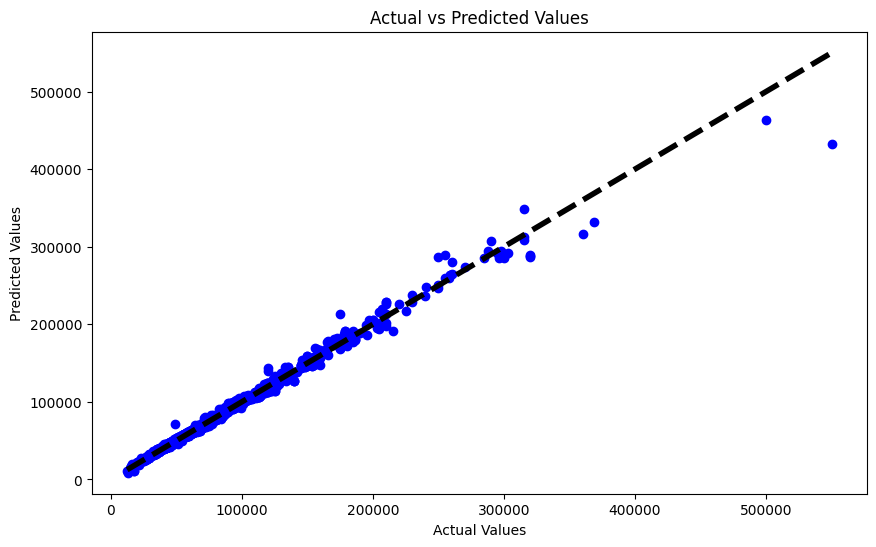

In [280]:
# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot of actual vs predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.show()

### Cross validation using LightGBMRegressor

In [281]:
# Initialize the model
lgb_regressor = lgb.LGBMRegressor()

# Perform cross-validation
scores = cross_val_score(lgb_regressor, X, y, cv=10, scoring='r2')  # cv is the number of folds; r2 for R-squared score

# Print R-squared scores for each fold
print("R-squared scores for each fold:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.4f}")  # Formats the score to 4 decimal places

# Printing the average R-squared score
average_score = scores.mean()
print(f"\nAverage R-squared across all folds: {average_score:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 707
[LightGBM] [Info] Number of data points in the train set: 8991, number of used features: 18
[LightGBM] [Info] Start training from score 75734.005895
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 703
[LightGBM] [Info] Number of data points in the train set: 8991, number of used features: 18
[LightGBM] [Info] Start training from score 76189.213213
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not e

### Visualizing the Cross-Validation Scores for LightGBMRegressor

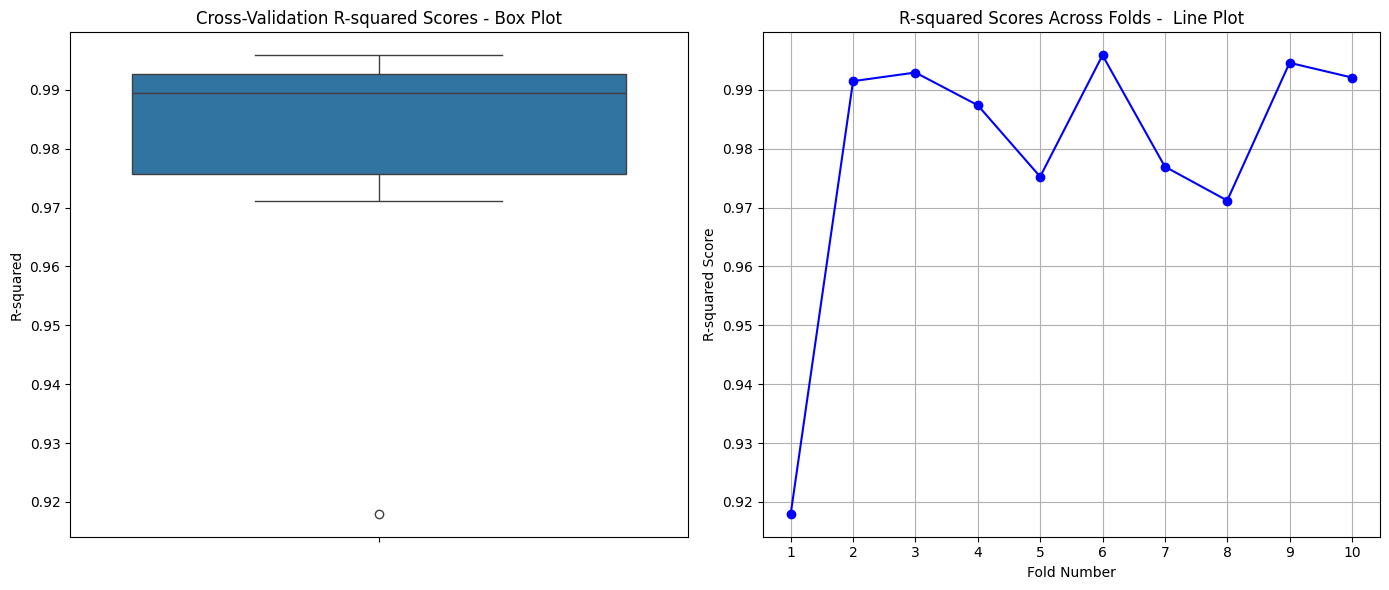

In [282]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Create a subplot for the box plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=scores)
plt.title('Cross-Validation R-squared Scores - Box Plot')
plt.ylabel('R-squared')

# Create a subplot for the line plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
plt.title('R-squared Scores Across Folds -  Line Plot')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.xticks(range(1, len(scores) + 1))
plt.grid(True)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

# 6. CatBoostRegressor

In [283]:
# Initialize the model
catboost_regressor = CatBoostRegressor(n_estimators=100, learning_rate=0.1, depth=3, random_state=42, verbose=0)

# Fit the model to the training data
catboost_regressor.fit(X_train, y_train)

# Making predictions on the Test set
y_pred = catboost_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print("Mean Absolute Error:", mae)
print("R-squared:", r2)  # This gives an indication of the goodness of fit 


Mean Absolute Error: 2418.7174637679336
R-squared: 0.989215963951173


### Graphing to check the accuracy of CatBoostRegressor

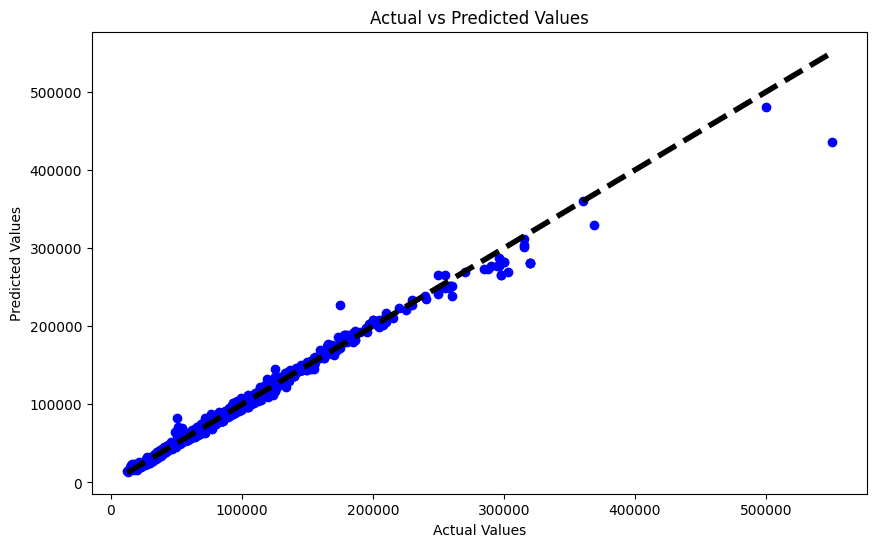

In [284]:
# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot of actual vs predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.show()

### Cross validation using CatBoostRegressor

In [285]:
# Initialize the model
catboost_regressor = CatBoostRegressor()

# Perform cross-validation
scores = cross_val_score(catboost_regressor, X, y, cv=10, scoring='r2')  # cv is the number of folds; r2 for R-squared score

# Print R-squared scores for each fold
print("R-squared scores for each fold:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.4f}")  # Formats the score to 4 decimal places

# Printing the average R-squared score
average_score = scores.mean()
print(f"\nAverage R-squared across all folds: {average_score:.4f}")

Learning rate set to 0.057927
0:	learn: 43507.4069481	total: 2.1ms	remaining: 2.1s
1:	learn: 41448.6738599	total: 3.99ms	remaining: 1.99s
2:	learn: 39575.4862351	total: 6ms	remaining: 2s
3:	learn: 37855.0096246	total: 8.07ms	remaining: 2.01s
4:	learn: 36103.0682744	total: 9.99ms	remaining: 1.99s
5:	learn: 34438.4891194	total: 12.3ms	remaining: 2.04s
6:	learn: 32894.0549253	total: 14.5ms	remaining: 2.06s
7:	learn: 31517.2454837	total: 16.7ms	remaining: 2.07s
8:	learn: 30117.5158016	total: 18.6ms	remaining: 2.05s
9:	learn: 28758.6940448	total: 21.1ms	remaining: 2.09s
10:	learn: 27485.0754527	total: 22.9ms	remaining: 2.05s
11:	learn: 26272.9207135	total: 24.7ms	remaining: 2.03s
12:	learn: 25142.8518693	total: 26.4ms	remaining: 2s
13:	learn: 24127.3468542	total: 28.4ms	remaining: 2s
14:	learn: 23138.9896424	total: 30.2ms	remaining: 1.98s
15:	learn: 22195.4888680	total: 31.9ms	remaining: 1.96s
16:	learn: 21232.9955121	total: 33.7ms	remaining: 1.95s
17:	learn: 20355.4732794	total: 35.3ms	rem

218:	learn: 1793.8433934	total: 395ms	remaining: 1.41s
219:	learn: 1788.2594235	total: 397ms	remaining: 1.41s
220:	learn: 1781.7403880	total: 399ms	remaining: 1.41s
221:	learn: 1780.5905100	total: 401ms	remaining: 1.41s
222:	learn: 1775.8025614	total: 403ms	remaining: 1.4s
223:	learn: 1768.0221102	total: 405ms	remaining: 1.4s
224:	learn: 1762.1715474	total: 406ms	remaining: 1.4s
225:	learn: 1756.0612818	total: 408ms	remaining: 1.4s
226:	learn: 1751.7356718	total: 410ms	remaining: 1.4s
227:	learn: 1750.6928938	total: 412ms	remaining: 1.4s
228:	learn: 1748.6486931	total: 414ms	remaining: 1.39s
229:	learn: 1743.4955457	total: 415ms	remaining: 1.39s
230:	learn: 1739.1160785	total: 417ms	remaining: 1.39s
231:	learn: 1733.5288372	total: 419ms	remaining: 1.39s
232:	learn: 1732.2982047	total: 420ms	remaining: 1.38s
233:	learn: 1725.6168260	total: 422ms	remaining: 1.38s
234:	learn: 1720.9141433	total: 424ms	remaining: 1.38s
235:	learn: 1719.0704552	total: 426ms	remaining: 1.38s
236:	learn: 1713

429:	learn: 1120.8114093	total: 782ms	remaining: 1.03s
430:	learn: 1118.6890785	total: 784ms	remaining: 1.03s
431:	learn: 1116.6710891	total: 786ms	remaining: 1.03s
432:	learn: 1114.7122420	total: 788ms	remaining: 1.03s
433:	learn: 1114.0641629	total: 790ms	remaining: 1.03s
434:	learn: 1111.6349659	total: 792ms	remaining: 1.03s
435:	learn: 1108.8742222	total: 794ms	remaining: 1.03s
436:	learn: 1106.9576203	total: 796ms	remaining: 1.02s
437:	learn: 1106.1605165	total: 798ms	remaining: 1.02s
438:	learn: 1104.0777783	total: 800ms	remaining: 1.02s
439:	learn: 1102.4809006	total: 802ms	remaining: 1.02s
440:	learn: 1101.9080204	total: 804ms	remaining: 1.02s
441:	learn: 1100.0084660	total: 806ms	remaining: 1.02s
442:	learn: 1099.4624182	total: 808ms	remaining: 1.01s
443:	learn: 1097.1603148	total: 810ms	remaining: 1.01s
444:	learn: 1095.4240852	total: 812ms	remaining: 1.01s
445:	learn: 1093.1534328	total: 814ms	remaining: 1.01s
446:	learn: 1090.7127030	total: 816ms	remaining: 1.01s
447:	learn

645:	learn: 826.7032489	total: 1.18s	remaining: 649ms
646:	learn: 826.0148303	total: 1.19s	remaining: 648ms
647:	learn: 824.7518369	total: 1.19s	remaining: 646ms
648:	learn: 823.8403812	total: 1.19s	remaining: 644ms
649:	learn: 822.9714911	total: 1.19s	remaining: 642ms
650:	learn: 821.8653650	total: 1.19s	remaining: 640ms
651:	learn: 821.1984255	total: 1.2s	remaining: 638ms
652:	learn: 820.0543615	total: 1.2s	remaining: 637ms
653:	learn: 819.2091355	total: 1.2s	remaining: 635ms
654:	learn: 818.4438360	total: 1.2s	remaining: 633ms
655:	learn: 817.5135577	total: 1.2s	remaining: 631ms
656:	learn: 815.7510336	total: 1.21s	remaining: 630ms
657:	learn: 814.4895861	total: 1.21s	remaining: 628ms
658:	learn: 813.5485418	total: 1.21s	remaining: 626ms
659:	learn: 812.9894812	total: 1.21s	remaining: 624ms
660:	learn: 812.0541073	total: 1.21s	remaining: 622ms
661:	learn: 811.1133359	total: 1.22s	remaining: 620ms
662:	learn: 809.8310744	total: 1.22s	remaining: 619ms
663:	learn: 809.4656334	total: 1.

858:	learn: 655.0182349	total: 1.58s	remaining: 259ms
859:	learn: 654.6469048	total: 1.58s	remaining: 258ms
860:	learn: 654.1002425	total: 1.58s	remaining: 256ms
861:	learn: 653.6207605	total: 1.59s	remaining: 254ms
862:	learn: 653.2022163	total: 1.59s	remaining: 252ms
863:	learn: 652.7385797	total: 1.59s	remaining: 251ms
864:	learn: 652.2978013	total: 1.59s	remaining: 249ms
865:	learn: 651.7619070	total: 1.59s	remaining: 247ms
866:	learn: 650.9546261	total: 1.6s	remaining: 245ms
867:	learn: 649.9898695	total: 1.6s	remaining: 243ms
868:	learn: 649.4740437	total: 1.6s	remaining: 242ms
869:	learn: 648.6904408	total: 1.6s	remaining: 240ms
870:	learn: 647.9391728	total: 1.6s	remaining: 238ms
871:	learn: 647.3909014	total: 1.61s	remaining: 236ms
872:	learn: 646.5897765	total: 1.61s	remaining: 234ms
873:	learn: 646.1256685	total: 1.61s	remaining: 232ms
874:	learn: 645.4097733	total: 1.61s	remaining: 230ms
875:	learn: 644.7695778	total: 1.61s	remaining: 229ms
876:	learn: 644.0590974	total: 1.

106:	learn: 3845.9532899	total: 196ms	remaining: 1.64s
107:	learn: 3811.9685160	total: 198ms	remaining: 1.64s
108:	learn: 3789.7618858	total: 200ms	remaining: 1.64s
109:	learn: 3753.0318236	total: 202ms	remaining: 1.64s
110:	learn: 3725.0564332	total: 204ms	remaining: 1.64s
111:	learn: 3702.5436272	total: 206ms	remaining: 1.63s
112:	learn: 3677.6183279	total: 208ms	remaining: 1.63s
113:	learn: 3665.5220299	total: 209ms	remaining: 1.63s
114:	learn: 3631.1351754	total: 212ms	remaining: 1.63s
115:	learn: 3601.8974391	total: 214ms	remaining: 1.63s
116:	learn: 3583.7570712	total: 216ms	remaining: 1.63s
117:	learn: 3557.3873589	total: 218ms	remaining: 1.63s
118:	learn: 3535.3772115	total: 221ms	remaining: 1.63s
119:	learn: 3507.9503801	total: 223ms	remaining: 1.64s
120:	learn: 3490.5558360	total: 225ms	remaining: 1.64s
121:	learn: 3456.7022589	total: 227ms	remaining: 1.63s
122:	learn: 3439.7043659	total: 230ms	remaining: 1.64s
123:	learn: 3416.1912332	total: 233ms	remaining: 1.64s
124:	learn

327:	learn: 1582.8004966	total: 608ms	remaining: 1.25s
328:	learn: 1577.2344432	total: 610ms	remaining: 1.24s
329:	learn: 1572.1692920	total: 612ms	remaining: 1.24s
330:	learn: 1571.1170736	total: 614ms	remaining: 1.24s
331:	learn: 1570.4757827	total: 616ms	remaining: 1.24s
332:	learn: 1567.0463308	total: 618ms	remaining: 1.24s
333:	learn: 1562.5742499	total: 620ms	remaining: 1.24s
334:	learn: 1556.2598931	total: 621ms	remaining: 1.23s
335:	learn: 1552.1010924	total: 624ms	remaining: 1.23s
336:	learn: 1547.0308044	total: 625ms	remaining: 1.23s
337:	learn: 1543.8196316	total: 627ms	remaining: 1.23s
338:	learn: 1539.9061712	total: 629ms	remaining: 1.23s
339:	learn: 1536.1874646	total: 631ms	remaining: 1.22s
340:	learn: 1533.2946319	total: 633ms	remaining: 1.22s
341:	learn: 1529.0444500	total: 635ms	remaining: 1.22s
342:	learn: 1524.5819120	total: 637ms	remaining: 1.22s
343:	learn: 1521.4417711	total: 639ms	remaining: 1.22s
344:	learn: 1517.0333102	total: 641ms	remaining: 1.22s
345:	learn

539:	learn: 1061.7148707	total: 1.01s	remaining: 860ms
540:	learn: 1059.8526001	total: 1.01s	remaining: 858ms
541:	learn: 1058.5043729	total: 1.01s	remaining: 856ms
542:	learn: 1057.6315967	total: 1.01s	remaining: 855ms
543:	learn: 1055.2061218	total: 1.02s	remaining: 853ms
544:	learn: 1052.6518039	total: 1.02s	remaining: 851ms
545:	learn: 1050.6208289	total: 1.02s	remaining: 849ms
546:	learn: 1049.0635092	total: 1.02s	remaining: 847ms
547:	learn: 1048.4041738	total: 1.02s	remaining: 845ms
548:	learn: 1048.3375943	total: 1.03s	remaining: 843ms
549:	learn: 1047.7496491	total: 1.03s	remaining: 841ms
550:	learn: 1046.1113317	total: 1.03s	remaining: 839ms
551:	learn: 1044.8288783	total: 1.03s	remaining: 837ms
552:	learn: 1041.9151931	total: 1.03s	remaining: 835ms
553:	learn: 1039.8767669	total: 1.03s	remaining: 833ms
554:	learn: 1037.8991873	total: 1.04s	remaining: 832ms
555:	learn: 1037.8145216	total: 1.04s	remaining: 830ms
556:	learn: 1035.7542357	total: 1.04s	remaining: 828ms
557:	learn

762:	learn: 805.7925626	total: 1.42s	remaining: 440ms
763:	learn: 804.7454323	total: 1.42s	remaining: 438ms
764:	learn: 802.6300302	total: 1.42s	remaining: 436ms
765:	learn: 802.3303144	total: 1.42s	remaining: 435ms
766:	learn: 800.7960908	total: 1.42s	remaining: 433ms
767:	learn: 799.7540665	total: 1.43s	remaining: 431ms
768:	learn: 798.6608327	total: 1.43s	remaining: 429ms
769:	learn: 797.7308457	total: 1.43s	remaining: 427ms
770:	learn: 797.0803681	total: 1.43s	remaining: 425ms
771:	learn: 796.4509381	total: 1.43s	remaining: 423ms
772:	learn: 795.8943622	total: 1.44s	remaining: 422ms
773:	learn: 795.8690945	total: 1.44s	remaining: 420ms
774:	learn: 795.0676521	total: 1.44s	remaining: 418ms
775:	learn: 794.0597020	total: 1.44s	remaining: 416ms
776:	learn: 793.2719897	total: 1.44s	remaining: 414ms
777:	learn: 792.5588003	total: 1.44s	remaining: 412ms
778:	learn: 791.4577452	total: 1.45s	remaining: 410ms
779:	learn: 790.7364270	total: 1.45s	remaining: 408ms
780:	learn: 789.6291522	tota

972:	learn: 652.9823083	total: 1.82s	remaining: 50.4ms
973:	learn: 652.3229158	total: 1.82s	remaining: 48.6ms
974:	learn: 651.3434790	total: 1.82s	remaining: 46.7ms
975:	learn: 650.7621682	total: 1.82s	remaining: 44.8ms
976:	learn: 650.3678837	total: 1.82s	remaining: 43ms
977:	learn: 649.7442412	total: 1.83s	remaining: 41.1ms
978:	learn: 649.2318553	total: 1.83s	remaining: 39.2ms
979:	learn: 648.6247887	total: 1.83s	remaining: 37.4ms
980:	learn: 648.0629837	total: 1.83s	remaining: 35.5ms
981:	learn: 647.7041664	total: 1.83s	remaining: 33.6ms
982:	learn: 646.7303489	total: 1.84s	remaining: 31.8ms
983:	learn: 646.0517915	total: 1.84s	remaining: 29.9ms
984:	learn: 645.4341572	total: 1.84s	remaining: 28ms
985:	learn: 644.8534655	total: 1.84s	remaining: 26.2ms
986:	learn: 644.3329966	total: 1.84s	remaining: 24.3ms
987:	learn: 643.8476827	total: 1.85s	remaining: 22.4ms
988:	learn: 643.0313628	total: 1.85s	remaining: 20.6ms
989:	learn: 642.7860894	total: 1.85s	remaining: 18.7ms
990:	learn: 64

132:	learn: 3145.8376014	total: 253ms	remaining: 1.65s
133:	learn: 3128.8235583	total: 255ms	remaining: 1.65s
134:	learn: 3114.0530492	total: 257ms	remaining: 1.65s
135:	learn: 3099.5445566	total: 259ms	remaining: 1.64s
136:	learn: 3078.3226187	total: 261ms	remaining: 1.64s
137:	learn: 3054.2434466	total: 263ms	remaining: 1.64s
138:	learn: 3033.0484435	total: 265ms	remaining: 1.64s
139:	learn: 3016.6612824	total: 267ms	remaining: 1.64s
140:	learn: 2996.7565647	total: 269ms	remaining: 1.64s
141:	learn: 2973.7801769	total: 270ms	remaining: 1.63s
142:	learn: 2959.2806705	total: 272ms	remaining: 1.63s
143:	learn: 2942.9025688	total: 274ms	remaining: 1.63s
144:	learn: 2924.8765957	total: 276ms	remaining: 1.63s
145:	learn: 2913.0143650	total: 278ms	remaining: 1.63s
146:	learn: 2896.3591517	total: 280ms	remaining: 1.62s
147:	learn: 2882.8002998	total: 281ms	remaining: 1.62s
148:	learn: 2871.8907537	total: 283ms	remaining: 1.62s
149:	learn: 2855.3496672	total: 285ms	remaining: 1.62s
150:	learn

345:	learn: 1522.7516043	total: 654ms	remaining: 1.24s
346:	learn: 1517.1188037	total: 657ms	remaining: 1.24s
347:	learn: 1516.4593809	total: 659ms	remaining: 1.23s
348:	learn: 1512.0587647	total: 661ms	remaining: 1.23s
349:	learn: 1509.1529330	total: 663ms	remaining: 1.23s
350:	learn: 1508.5546746	total: 665ms	remaining: 1.23s
351:	learn: 1502.6443106	total: 667ms	remaining: 1.23s
352:	learn: 1501.9639670	total: 669ms	remaining: 1.23s
353:	learn: 1497.6540483	total: 671ms	remaining: 1.22s
354:	learn: 1495.8808754	total: 673ms	remaining: 1.22s
355:	learn: 1493.0511016	total: 674ms	remaining: 1.22s
356:	learn: 1490.3426621	total: 676ms	remaining: 1.22s
357:	learn: 1490.1193533	total: 678ms	remaining: 1.22s
358:	learn: 1488.3887524	total: 680ms	remaining: 1.21s
359:	learn: 1483.0408704	total: 681ms	remaining: 1.21s
360:	learn: 1481.7592648	total: 683ms	remaining: 1.21s
361:	learn: 1481.5503886	total: 685ms	remaining: 1.21s
362:	learn: 1476.2001793	total: 686ms	remaining: 1.2s
363:	learn:

559:	learn: 1026.5716394	total: 1.07s	remaining: 841ms
560:	learn: 1025.4189426	total: 1.07s	remaining: 840ms
561:	learn: 1023.5701192	total: 1.08s	remaining: 839ms
562:	learn: 1023.1618856	total: 1.08s	remaining: 839ms
563:	learn: 1020.7629866	total: 1.08s	remaining: 839ms
564:	learn: 1020.3673779	total: 1.09s	remaining: 838ms
565:	learn: 1018.2941094	total: 1.09s	remaining: 837ms
566:	learn: 1016.1198574	total: 1.09s	remaining: 836ms
567:	learn: 1014.0350743	total: 1.1s	remaining: 834ms
568:	learn: 1012.3045128	total: 1.1s	remaining: 832ms
569:	learn: 1011.3897874	total: 1.1s	remaining: 831ms
570:	learn: 1009.9892799	total: 1.1s	remaining: 829ms
571:	learn: 1008.7109500	total: 1.11s	remaining: 828ms
572:	learn: 1007.0593240	total: 1.11s	remaining: 827ms
573:	learn: 1005.4325117	total: 1.11s	remaining: 826ms
574:	learn: 1004.2454274	total: 1.11s	remaining: 824ms
575:	learn: 1003.5369652	total: 1.12s	remaining: 822ms
576:	learn: 1003.4902599	total: 1.12s	remaining: 820ms
577:	learn: 10

742:	learn: 813.9005768	total: 1.48s	remaining: 511ms
743:	learn: 813.4570105	total: 1.48s	remaining: 509ms
744:	learn: 811.9878244	total: 1.48s	remaining: 507ms
745:	learn: 810.7276042	total: 1.48s	remaining: 505ms
746:	learn: 810.4874582	total: 1.49s	remaining: 503ms
747:	learn: 810.4197407	total: 1.49s	remaining: 501ms
748:	learn: 809.7693945	total: 1.49s	remaining: 499ms
749:	learn: 809.3687379	total: 1.49s	remaining: 497ms
750:	learn: 808.0012384	total: 1.49s	remaining: 496ms
751:	learn: 807.5317290	total: 1.5s	remaining: 494ms
752:	learn: 806.1970294	total: 1.5s	remaining: 491ms
753:	learn: 804.4503641	total: 1.5s	remaining: 490ms
754:	learn: 804.4162903	total: 1.5s	remaining: 488ms
755:	learn: 803.9976416	total: 1.5s	remaining: 486ms
756:	learn: 802.5277554	total: 1.51s	remaining: 484ms
757:	learn: 802.4952392	total: 1.51s	remaining: 481ms
758:	learn: 801.2724122	total: 1.51s	remaining: 479ms
759:	learn: 800.3545122	total: 1.51s	remaining: 478ms
760:	learn: 799.2836981	total: 1.

936:	learn: 664.3284355	total: 1.88s	remaining: 126ms
937:	learn: 663.5371596	total: 1.88s	remaining: 124ms
938:	learn: 662.6292136	total: 1.88s	remaining: 122ms
939:	learn: 662.2202306	total: 1.89s	remaining: 120ms
940:	learn: 661.7660367	total: 1.89s	remaining: 118ms
941:	learn: 660.8388592	total: 1.89s	remaining: 116ms
942:	learn: 660.2059793	total: 1.89s	remaining: 114ms
943:	learn: 659.5216973	total: 1.89s	remaining: 112ms
944:	learn: 658.9105007	total: 1.9s	remaining: 110ms
945:	learn: 658.2297330	total: 1.9s	remaining: 108ms
946:	learn: 657.6883911	total: 1.9s	remaining: 106ms
947:	learn: 656.6982946	total: 1.9s	remaining: 104ms
948:	learn: 655.9399135	total: 1.9s	remaining: 102ms
949:	learn: 655.3035678	total: 1.91s	remaining: 100ms
950:	learn: 654.6854761	total: 1.91s	remaining: 98.3ms
951:	learn: 654.1023661	total: 1.91s	remaining: 96.3ms
952:	learn: 653.5595337	total: 1.91s	remaining: 94.3ms
953:	learn: 652.6505720	total: 1.91s	remaining: 92.3ms
954:	learn: 651.8931026	total

121:	learn: 3393.1443365	total: 225ms	remaining: 1.62s
122:	learn: 3364.8703856	total: 227ms	remaining: 1.62s
123:	learn: 3349.7511774	total: 230ms	remaining: 1.62s
124:	learn: 3332.9314622	total: 231ms	remaining: 1.62s
125:	learn: 3315.2217597	total: 234ms	remaining: 1.62s
126:	learn: 3298.1479127	total: 236ms	remaining: 1.62s
127:	learn: 3267.9615095	total: 237ms	remaining: 1.62s
128:	learn: 3246.6526150	total: 240ms	remaining: 1.62s
129:	learn: 3218.9138305	total: 241ms	remaining: 1.61s
130:	learn: 3202.1269722	total: 243ms	remaining: 1.61s
131:	learn: 3177.3251285	total: 245ms	remaining: 1.61s
132:	learn: 3163.2195342	total: 247ms	remaining: 1.61s
133:	learn: 3149.0569430	total: 248ms	remaining: 1.6s
134:	learn: 3129.2900407	total: 250ms	remaining: 1.6s
135:	learn: 3118.4730067	total: 252ms	remaining: 1.6s
136:	learn: 3090.5722745	total: 254ms	remaining: 1.6s
137:	learn: 3075.4597710	total: 256ms	remaining: 1.6s
138:	learn: 3059.0892053	total: 257ms	remaining: 1.59s
139:	learn: 304

341:	learn: 1505.0266914	total: 637ms	remaining: 1.23s
342:	learn: 1502.3065063	total: 641ms	remaining: 1.23s
343:	learn: 1500.1221048	total: 643ms	remaining: 1.23s
344:	learn: 1498.0085489	total: 646ms	remaining: 1.23s
345:	learn: 1494.4715341	total: 648ms	remaining: 1.22s
346:	learn: 1491.2088425	total: 650ms	remaining: 1.22s
347:	learn: 1486.6880038	total: 652ms	remaining: 1.22s
348:	learn: 1483.1076539	total: 654ms	remaining: 1.22s
349:	learn: 1477.9435776	total: 656ms	remaining: 1.22s
350:	learn: 1472.8444605	total: 658ms	remaining: 1.22s
351:	learn: 1469.5239472	total: 659ms	remaining: 1.21s
352:	learn: 1464.9387261	total: 661ms	remaining: 1.21s
353:	learn: 1463.1700764	total: 663ms	remaining: 1.21s
354:	learn: 1460.6470234	total: 665ms	remaining: 1.21s
355:	learn: 1456.7232181	total: 667ms	remaining: 1.21s
356:	learn: 1452.9344640	total: 669ms	remaining: 1.2s
357:	learn: 1449.1256812	total: 670ms	remaining: 1.2s
358:	learn: 1447.4611909	total: 672ms	remaining: 1.2s
359:	learn: 1

546:	learn: 1033.2579745	total: 1.02s	remaining: 848ms
547:	learn: 1032.1437684	total: 1.03s	remaining: 847ms
548:	learn: 1029.7958674	total: 1.03s	remaining: 845ms
549:	learn: 1028.2685237	total: 1.03s	remaining: 844ms
550:	learn: 1026.9294277	total: 1.03s	remaining: 842ms
551:	learn: 1023.6961201	total: 1.04s	remaining: 841ms
552:	learn: 1021.6142331	total: 1.04s	remaining: 839ms
553:	learn: 1019.9621216	total: 1.04s	remaining: 838ms
554:	learn: 1017.3174337	total: 1.04s	remaining: 836ms
555:	learn: 1015.7244449	total: 1.04s	remaining: 834ms
556:	learn: 1014.3926911	total: 1.04s	remaining: 832ms
557:	learn: 1013.3879795	total: 1.05s	remaining: 830ms
558:	learn: 1011.1224242	total: 1.05s	remaining: 828ms
559:	learn: 1009.2277416	total: 1.05s	remaining: 826ms
560:	learn: 1006.3355624	total: 1.05s	remaining: 824ms
561:	learn: 1004.7826821	total: 1.05s	remaining: 822ms
562:	learn: 1002.7883544	total: 1.06s	remaining: 820ms
563:	learn: 1000.7772738	total: 1.06s	remaining: 818ms
564:	learn

754:	learn: 784.0829010	total: 1.42s	remaining: 462ms
755:	learn: 782.8800150	total: 1.43s	remaining: 460ms
756:	learn: 782.0987392	total: 1.43s	remaining: 458ms
757:	learn: 781.1647343	total: 1.43s	remaining: 457ms
758:	learn: 780.6225034	total: 1.43s	remaining: 455ms
759:	learn: 779.6329659	total: 1.43s	remaining: 453ms
760:	learn: 778.8907317	total: 1.44s	remaining: 451ms
761:	learn: 778.5865137	total: 1.44s	remaining: 449ms
762:	learn: 777.6107366	total: 1.44s	remaining: 447ms
763:	learn: 776.2232006	total: 1.44s	remaining: 446ms
764:	learn: 775.8903457	total: 1.44s	remaining: 444ms
765:	learn: 775.5044329	total: 1.45s	remaining: 442ms
766:	learn: 774.6467317	total: 1.45s	remaining: 440ms
767:	learn: 773.8907946	total: 1.45s	remaining: 438ms
768:	learn: 772.9302491	total: 1.45s	remaining: 436ms
769:	learn: 771.8511032	total: 1.45s	remaining: 434ms
770:	learn: 771.0922802	total: 1.46s	remaining: 432ms
771:	learn: 770.0780510	total: 1.46s	remaining: 430ms
772:	learn: 769.2038344	tota

966:	learn: 641.9151416	total: 1.82s	remaining: 62.3ms
967:	learn: 641.4746025	total: 1.83s	remaining: 60.4ms
968:	learn: 640.7574348	total: 1.83s	remaining: 58.5ms
969:	learn: 640.0970015	total: 1.83s	remaining: 56.7ms
970:	learn: 639.5196742	total: 1.83s	remaining: 54.8ms
971:	learn: 638.7683668	total: 1.84s	remaining: 52.9ms
972:	learn: 638.4396596	total: 1.84s	remaining: 51ms
973:	learn: 636.9925547	total: 1.84s	remaining: 49.1ms
974:	learn: 636.5204442	total: 1.84s	remaining: 47.2ms
975:	learn: 636.0334924	total: 1.84s	remaining: 45.4ms
976:	learn: 634.9532772	total: 1.85s	remaining: 43.5ms
977:	learn: 634.2345946	total: 1.85s	remaining: 41.6ms
978:	learn: 633.8273838	total: 1.85s	remaining: 39.7ms
979:	learn: 633.2348891	total: 1.85s	remaining: 37.8ms
980:	learn: 632.6314763	total: 1.85s	remaining: 35.9ms
981:	learn: 632.1468709	total: 1.85s	remaining: 34ms
982:	learn: 631.2815432	total: 1.86s	remaining: 32.1ms
983:	learn: 630.5107723	total: 1.86s	remaining: 30.2ms
984:	learn: 62

138:	learn: 3190.3293185	total: 257ms	remaining: 1.59s
139:	learn: 3173.4519446	total: 259ms	remaining: 1.59s
140:	learn: 3157.2515143	total: 261ms	remaining: 1.59s
141:	learn: 3137.4634170	total: 263ms	remaining: 1.59s
142:	learn: 3123.2063719	total: 265ms	remaining: 1.59s
143:	learn: 3101.5884865	total: 267ms	remaining: 1.59s
144:	learn: 3085.9940426	total: 269ms	remaining: 1.58s
145:	learn: 3070.3893233	total: 271ms	remaining: 1.58s
146:	learn: 3056.8213218	total: 273ms	remaining: 1.58s
147:	learn: 3042.5094662	total: 275ms	remaining: 1.58s
148:	learn: 3025.4121639	total: 276ms	remaining: 1.58s
149:	learn: 3011.5494930	total: 278ms	remaining: 1.58s
150:	learn: 2994.0056236	total: 280ms	remaining: 1.57s
151:	learn: 2979.3981341	total: 282ms	remaining: 1.57s
152:	learn: 2962.4120195	total: 284ms	remaining: 1.57s
153:	learn: 2942.5667017	total: 285ms	remaining: 1.57s
154:	learn: 2929.5666914	total: 287ms	remaining: 1.57s
155:	learn: 2916.5889817	total: 289ms	remaining: 1.56s
156:	learn

352:	learn: 1590.0655584	total: 650ms	remaining: 1.19s
353:	learn: 1586.6083889	total: 652ms	remaining: 1.19s
354:	learn: 1581.7245585	total: 654ms	remaining: 1.19s
355:	learn: 1580.1280774	total: 656ms	remaining: 1.19s
356:	learn: 1574.6909429	total: 658ms	remaining: 1.18s
357:	learn: 1572.0192485	total: 660ms	remaining: 1.18s
358:	learn: 1569.1176997	total: 662ms	remaining: 1.18s
359:	learn: 1563.9331979	total: 664ms	remaining: 1.18s
360:	learn: 1558.7180455	total: 666ms	remaining: 1.18s
361:	learn: 1553.7287475	total: 668ms	remaining: 1.18s
362:	learn: 1550.1646947	total: 670ms	remaining: 1.18s
363:	learn: 1545.3341808	total: 672ms	remaining: 1.17s
364:	learn: 1541.6449917	total: 674ms	remaining: 1.17s
365:	learn: 1538.2833074	total: 675ms	remaining: 1.17s
366:	learn: 1535.3298298	total: 677ms	remaining: 1.17s
367:	learn: 1531.2114647	total: 679ms	remaining: 1.17s
368:	learn: 1527.2870174	total: 681ms	remaining: 1.16s
369:	learn: 1520.3852824	total: 683ms	remaining: 1.16s
370:	learn

533:	learn: 1112.0327819	total: 1.03s	remaining: 904ms
534:	learn: 1110.1497619	total: 1.04s	remaining: 902ms
535:	learn: 1109.7233096	total: 1.04s	remaining: 900ms
536:	learn: 1106.7128453	total: 1.04s	remaining: 898ms
537:	learn: 1106.1299813	total: 1.04s	remaining: 896ms
538:	learn: 1103.5783031	total: 1.05s	remaining: 895ms
539:	learn: 1101.5387125	total: 1.05s	remaining: 893ms
540:	learn: 1100.0567118	total: 1.05s	remaining: 891ms
541:	learn: 1097.1063069	total: 1.05s	remaining: 889ms
542:	learn: 1094.3769369	total: 1.05s	remaining: 887ms
543:	learn: 1091.8615321	total: 1.05s	remaining: 885ms
544:	learn: 1090.2101126	total: 1.06s	remaining: 883ms
545:	learn: 1088.2455334	total: 1.06s	remaining: 881ms
546:	learn: 1086.0799844	total: 1.06s	remaining: 879ms
547:	learn: 1084.2669713	total: 1.06s	remaining: 877ms
548:	learn: 1082.9140385	total: 1.06s	remaining: 875ms
549:	learn: 1081.5025658	total: 1.07s	remaining: 873ms
550:	learn: 1079.9004435	total: 1.07s	remaining: 871ms
551:	learn

734:	learn: 830.7731265	total: 1.42s	remaining: 512ms
735:	learn: 828.9289855	total: 1.42s	remaining: 510ms
736:	learn: 827.9022033	total: 1.42s	remaining: 508ms
737:	learn: 826.8516308	total: 1.43s	remaining: 506ms
738:	learn: 824.9757915	total: 1.43s	remaining: 505ms
739:	learn: 823.8093530	total: 1.43s	remaining: 503ms
740:	learn: 822.9107466	total: 1.43s	remaining: 501ms
741:	learn: 821.8042552	total: 1.44s	remaining: 499ms
742:	learn: 821.0699760	total: 1.44s	remaining: 497ms
743:	learn: 819.3331584	total: 1.44s	remaining: 495ms
744:	learn: 818.8990094	total: 1.44s	remaining: 493ms
745:	learn: 818.3685185	total: 1.44s	remaining: 491ms
746:	learn: 816.9546479	total: 1.44s	remaining: 489ms
747:	learn: 816.0450397	total: 1.45s	remaining: 487ms
748:	learn: 815.0444057	total: 1.45s	remaining: 485ms
749:	learn: 814.1987118	total: 1.45s	remaining: 484ms
750:	learn: 813.8564169	total: 1.45s	remaining: 482ms
751:	learn: 812.6235520	total: 1.45s	remaining: 480ms
752:	learn: 811.1710817	tota

942:	learn: 657.0610966	total: 1.82s	remaining: 110ms
943:	learn: 656.0354856	total: 1.82s	remaining: 108ms
944:	learn: 655.3729752	total: 1.82s	remaining: 106ms
945:	learn: 654.5347662	total: 1.83s	remaining: 104ms
946:	learn: 653.8456625	total: 1.83s	remaining: 102ms
947:	learn: 653.2383337	total: 1.83s	remaining: 100ms
948:	learn: 652.6302035	total: 1.83s	remaining: 98.5ms
949:	learn: 652.3070678	total: 1.83s	remaining: 96.6ms
950:	learn: 651.2521742	total: 1.84s	remaining: 94.6ms
951:	learn: 650.4760445	total: 1.84s	remaining: 92.7ms
952:	learn: 649.8335844	total: 1.84s	remaining: 90.8ms
953:	learn: 649.2726862	total: 1.84s	remaining: 88.9ms
954:	learn: 648.8384551	total: 1.85s	remaining: 87ms
955:	learn: 647.9157616	total: 1.85s	remaining: 85.1ms
956:	learn: 646.6725547	total: 1.85s	remaining: 83.2ms
957:	learn: 646.1821274	total: 1.85s	remaining: 81.3ms
958:	learn: 645.6878360	total: 1.86s	remaining: 79.4ms
959:	learn: 645.2140406	total: 1.86s	remaining: 77.5ms
960:	learn: 644.62

100:	learn: 4140.8842942	total: 208ms	remaining: 1.85s
101:	learn: 4112.7904579	total: 211ms	remaining: 1.85s
102:	learn: 4085.3004719	total: 213ms	remaining: 1.85s
103:	learn: 4052.3086838	total: 215ms	remaining: 1.85s
104:	learn: 4024.4297399	total: 217ms	remaining: 1.85s
105:	learn: 3984.3073601	total: 219ms	remaining: 1.85s
106:	learn: 3956.5340122	total: 222ms	remaining: 1.85s
107:	learn: 3929.6551997	total: 224ms	remaining: 1.85s
108:	learn: 3897.5060439	total: 226ms	remaining: 1.85s
109:	learn: 3870.5886984	total: 228ms	remaining: 1.84s
110:	learn: 3844.2199387	total: 230ms	remaining: 1.84s
111:	learn: 3818.4681637	total: 232ms	remaining: 1.84s
112:	learn: 3791.2536439	total: 234ms	remaining: 1.83s
113:	learn: 3760.1997420	total: 235ms	remaining: 1.83s
114:	learn: 3738.3380720	total: 237ms	remaining: 1.83s
115:	learn: 3711.1961138	total: 239ms	remaining: 1.82s
116:	learn: 3688.2397703	total: 241ms	remaining: 1.82s
117:	learn: 3662.8097066	total: 243ms	remaining: 1.82s
118:	learn

301:	learn: 1772.4412820	total: 596ms	remaining: 1.38s
302:	learn: 1767.2380355	total: 598ms	remaining: 1.38s
303:	learn: 1760.0931083	total: 600ms	remaining: 1.37s
304:	learn: 1757.0746723	total: 603ms	remaining: 1.37s
305:	learn: 1755.8152020	total: 604ms	remaining: 1.37s
306:	learn: 1751.6932579	total: 606ms	remaining: 1.37s
307:	learn: 1746.6082070	total: 608ms	remaining: 1.37s
308:	learn: 1743.6440278	total: 610ms	remaining: 1.36s
309:	learn: 1738.7776482	total: 612ms	remaining: 1.36s
310:	learn: 1735.1527581	total: 614ms	remaining: 1.36s
311:	learn: 1730.3325922	total: 616ms	remaining: 1.36s
312:	learn: 1725.6965029	total: 618ms	remaining: 1.36s
313:	learn: 1722.0775726	total: 620ms	remaining: 1.35s
314:	learn: 1717.6207632	total: 623ms	remaining: 1.35s
315:	learn: 1714.9986319	total: 625ms	remaining: 1.35s
316:	learn: 1711.0934104	total: 627ms	remaining: 1.35s
317:	learn: 1706.8682082	total: 629ms	remaining: 1.35s
318:	learn: 1702.8016374	total: 630ms	remaining: 1.34s
319:	learn

512:	learn: 1144.1188928	total: 990ms	remaining: 940ms
513:	learn: 1141.9919654	total: 993ms	remaining: 939ms
514:	learn: 1141.5754617	total: 995ms	remaining: 937ms
515:	learn: 1138.6787643	total: 997ms	remaining: 935ms
516:	learn: 1137.5314064	total: 999ms	remaining: 933ms
517:	learn: 1134.3073291	total: 1s	remaining: 931ms
518:	learn: 1131.8348552	total: 1s	remaining: 929ms
519:	learn: 1129.8373904	total: 1s	remaining: 928ms
520:	learn: 1127.8032141	total: 1.01s	remaining: 926ms
521:	learn: 1125.1977198	total: 1.01s	remaining: 925ms
522:	learn: 1123.8425827	total: 1.01s	remaining: 923ms
523:	learn: 1121.6692335	total: 1.01s	remaining: 922ms
524:	learn: 1118.9237288	total: 1.02s	remaining: 920ms
525:	learn: 1116.3883677	total: 1.02s	remaining: 919ms
526:	learn: 1115.7997617	total: 1.02s	remaining: 917ms
527:	learn: 1114.5750349	total: 1.02s	remaining: 916ms
528:	learn: 1112.6269596	total: 1.03s	remaining: 914ms
529:	learn: 1110.1274828	total: 1.03s	remaining: 913ms
530:	learn: 1108.12

722:	learn: 848.8297171	total: 1.39s	remaining: 532ms
723:	learn: 848.3611238	total: 1.39s	remaining: 531ms
724:	learn: 847.0982127	total: 1.39s	remaining: 529ms
725:	learn: 846.1662596	total: 1.4s	remaining: 527ms
726:	learn: 845.3780392	total: 1.4s	remaining: 525ms
727:	learn: 844.3976569	total: 1.4s	remaining: 523ms
728:	learn: 843.4794979	total: 1.4s	remaining: 521ms
729:	learn: 842.4882187	total: 1.4s	remaining: 519ms
730:	learn: 841.4057615	total: 1.41s	remaining: 518ms
731:	learn: 840.4656997	total: 1.41s	remaining: 516ms
732:	learn: 838.7702129	total: 1.41s	remaining: 514ms
733:	learn: 837.9080625	total: 1.41s	remaining: 512ms
734:	learn: 836.9482491	total: 1.41s	remaining: 510ms
735:	learn: 835.4765259	total: 1.42s	remaining: 508ms
736:	learn: 834.2288635	total: 1.42s	remaining: 506ms
737:	learn: 833.4289161	total: 1.42s	remaining: 504ms
738:	learn: 832.5396179	total: 1.42s	remaining: 502ms
739:	learn: 831.7364013	total: 1.42s	remaining: 500ms
740:	learn: 830.5703261	total: 1.

927:	learn: 688.7068941	total: 1.77s	remaining: 138ms
928:	learn: 688.2422284	total: 1.77s	remaining: 136ms
929:	learn: 687.5836588	total: 1.78s	remaining: 134ms
930:	learn: 686.7663497	total: 1.78s	remaining: 132ms
931:	learn: 686.2983622	total: 1.78s	remaining: 130ms
932:	learn: 685.8205605	total: 1.78s	remaining: 128ms
933:	learn: 684.9092987	total: 1.79s	remaining: 126ms
934:	learn: 684.3014811	total: 1.79s	remaining: 124ms
935:	learn: 683.2934056	total: 1.79s	remaining: 122ms
936:	learn: 682.8932281	total: 1.79s	remaining: 121ms
937:	learn: 682.3389243	total: 1.79s	remaining: 119ms
938:	learn: 681.3493468	total: 1.8s	remaining: 117ms
939:	learn: 680.7067940	total: 1.8s	remaining: 115ms
940:	learn: 680.1433683	total: 1.8s	remaining: 113ms
941:	learn: 679.6078586	total: 1.8s	remaining: 111ms
942:	learn: 679.1296045	total: 1.8s	remaining: 109ms
943:	learn: 679.0203674	total: 1.8s	remaining: 107ms
944:	learn: 678.4548354	total: 1.81s	remaining: 105ms
945:	learn: 677.8703031	total: 1.8

104:	learn: 3937.6311696	total: 197ms	remaining: 1.68s
105:	learn: 3911.3198503	total: 200ms	remaining: 1.68s
106:	learn: 3883.6696298	total: 202ms	remaining: 1.68s
107:	learn: 3837.3199331	total: 203ms	remaining: 1.68s
108:	learn: 3813.3575366	total: 206ms	remaining: 1.68s
109:	learn: 3774.7381508	total: 208ms	remaining: 1.68s
110:	learn: 3751.3111749	total: 210ms	remaining: 1.68s
111:	learn: 3727.2601446	total: 212ms	remaining: 1.68s
112:	learn: 3692.5363998	total: 214ms	remaining: 1.68s
113:	learn: 3662.5606738	total: 216ms	remaining: 1.68s
114:	learn: 3645.2221588	total: 218ms	remaining: 1.67s
115:	learn: 3622.9117088	total: 220ms	remaining: 1.67s
116:	learn: 3593.5404964	total: 221ms	remaining: 1.67s
117:	learn: 3570.0457029	total: 223ms	remaining: 1.67s
118:	learn: 3552.6543319	total: 225ms	remaining: 1.67s
119:	learn: 3532.5391335	total: 227ms	remaining: 1.66s
120:	learn: 3511.6384554	total: 229ms	remaining: 1.66s
121:	learn: 3491.3865995	total: 231ms	remaining: 1.66s
122:	learn

318:	learn: 1495.2752356	total: 597ms	remaining: 1.27s
319:	learn: 1490.7350916	total: 600ms	remaining: 1.27s
320:	learn: 1488.6098211	total: 601ms	remaining: 1.27s
321:	learn: 1486.3947650	total: 604ms	remaining: 1.27s
322:	learn: 1481.0087957	total: 606ms	remaining: 1.27s
323:	learn: 1476.1187285	total: 608ms	remaining: 1.27s
324:	learn: 1471.9314775	total: 610ms	remaining: 1.27s
325:	learn: 1467.4536764	total: 612ms	remaining: 1.26s
326:	learn: 1462.3744720	total: 614ms	remaining: 1.26s
327:	learn: 1458.0888517	total: 616ms	remaining: 1.26s
328:	learn: 1454.8048602	total: 618ms	remaining: 1.26s
329:	learn: 1450.6603275	total: 620ms	remaining: 1.26s
330:	learn: 1446.2448355	total: 622ms	remaining: 1.26s
331:	learn: 1442.7823554	total: 624ms	remaining: 1.25s
332:	learn: 1438.7675575	total: 625ms	remaining: 1.25s
333:	learn: 1434.7443220	total: 627ms	remaining: 1.25s
334:	learn: 1431.4892789	total: 629ms	remaining: 1.25s
335:	learn: 1427.8492214	total: 631ms	remaining: 1.25s
336:	learn

528:	learn: 1009.3422804	total: 992ms	remaining: 884ms
529:	learn: 1007.0123998	total: 995ms	remaining: 882ms
530:	learn: 1006.4871650	total: 997ms	remaining: 881ms
531:	learn: 1004.5932696	total: 999ms	remaining: 879ms
532:	learn: 1002.2934792	total: 1s	remaining: 877ms
533:	learn: 999.7094637	total: 1s	remaining: 876ms
534:	learn: 998.0579943	total: 1.01s	remaining: 874ms
535:	learn: 996.5568241	total: 1.01s	remaining: 873ms
536:	learn: 994.9964085	total: 1.01s	remaining: 871ms
537:	learn: 993.2756569	total: 1.01s	remaining: 869ms
538:	learn: 991.5102712	total: 1.01s	remaining: 867ms
539:	learn: 989.7802601	total: 1.01s	remaining: 865ms
540:	learn: 989.3221045	total: 1.02s	remaining: 863ms
541:	learn: 987.6770512	total: 1.02s	remaining: 861ms
542:	learn: 987.2325067	total: 1.02s	remaining: 859ms
543:	learn: 985.5091098	total: 1.02s	remaining: 857ms
544:	learn: 984.3935223	total: 1.02s	remaining: 855ms
545:	learn: 983.0069716	total: 1.03s	remaining: 853ms
546:	learn: 981.3619929	total

730:	learn: 793.1346834	total: 1.38s	remaining: 507ms
731:	learn: 792.1810350	total: 1.38s	remaining: 505ms
732:	learn: 791.5973115	total: 1.38s	remaining: 503ms
733:	learn: 790.6772475	total: 1.38s	remaining: 501ms
734:	learn: 789.8449043	total: 1.39s	remaining: 500ms
735:	learn: 788.9666284	total: 1.39s	remaining: 498ms
736:	learn: 788.2007649	total: 1.39s	remaining: 496ms
737:	learn: 788.1774814	total: 1.39s	remaining: 494ms
738:	learn: 787.2120359	total: 1.39s	remaining: 492ms
739:	learn: 786.2208689	total: 1.4s	remaining: 490ms
740:	learn: 785.1282606	total: 1.4s	remaining: 488ms
741:	learn: 784.1745760	total: 1.4s	remaining: 486ms
742:	learn: 783.6210808	total: 1.4s	remaining: 485ms
743:	learn: 783.5998597	total: 1.4s	remaining: 483ms
744:	learn: 782.4696520	total: 1.4s	remaining: 481ms
745:	learn: 782.4454860	total: 1.41s	remaining: 479ms
746:	learn: 782.1638186	total: 1.41s	remaining: 477ms
747:	learn: 781.9714684	total: 1.41s	remaining: 476ms
748:	learn: 781.3999109	total: 1.4

931:	learn: 657.1358831	total: 1.78s	remaining: 130ms
932:	learn: 656.5745208	total: 1.78s	remaining: 128ms
933:	learn: 655.9946132	total: 1.78s	remaining: 126ms
934:	learn: 655.3033077	total: 1.78s	remaining: 124ms
935:	learn: 654.4241060	total: 1.79s	remaining: 122ms
936:	learn: 653.6992143	total: 1.79s	remaining: 120ms
937:	learn: 653.2211164	total: 1.79s	remaining: 118ms
938:	learn: 652.3764383	total: 1.79s	remaining: 117ms
939:	learn: 651.8437659	total: 1.8s	remaining: 115ms
940:	learn: 650.9701854	total: 1.8s	remaining: 113ms
941:	learn: 650.8141429	total: 1.8s	remaining: 111ms
942:	learn: 650.3197207	total: 1.8s	remaining: 109ms
943:	learn: 649.9235028	total: 1.81s	remaining: 107ms
944:	learn: 649.2842341	total: 1.81s	remaining: 105ms
945:	learn: 648.5678996	total: 1.81s	remaining: 103ms
946:	learn: 648.2891742	total: 1.81s	remaining: 101ms
947:	learn: 647.5627549	total: 1.81s	remaining: 99.6ms
948:	learn: 646.9061850	total: 1.82s	remaining: 97.7ms
949:	learn: 646.3410424	total:

108:	learn: 3994.4975741	total: 202ms	remaining: 1.65s
109:	learn: 3975.7768839	total: 204ms	remaining: 1.65s
110:	learn: 3937.9453628	total: 206ms	remaining: 1.65s
111:	learn: 3911.4704724	total: 208ms	remaining: 1.65s
112:	learn: 3884.8474937	total: 210ms	remaining: 1.65s
113:	learn: 3872.6128276	total: 212ms	remaining: 1.65s
114:	learn: 3847.7154054	total: 215ms	remaining: 1.65s
115:	learn: 3825.5230000	total: 217ms	remaining: 1.65s
116:	learn: 3804.7104192	total: 218ms	remaining: 1.65s
117:	learn: 3794.5600234	total: 220ms	remaining: 1.65s
118:	learn: 3774.4871225	total: 222ms	remaining: 1.64s
119:	learn: 3759.5003471	total: 224ms	remaining: 1.64s
120:	learn: 3738.7380896	total: 226ms	remaining: 1.64s
121:	learn: 3730.3130110	total: 227ms	remaining: 1.64s
122:	learn: 3709.3918958	total: 229ms	remaining: 1.63s
123:	learn: 3702.9589349	total: 231ms	remaining: 1.63s
124:	learn: 3683.4447248	total: 233ms	remaining: 1.63s
125:	learn: 3681.8718086	total: 234ms	remaining: 1.62s
126:	learn

320:	learn: 1752.6791304	total: 588ms	remaining: 1.24s
321:	learn: 1746.9978267	total: 590ms	remaining: 1.24s
322:	learn: 1740.9909810	total: 593ms	remaining: 1.24s
323:	learn: 1734.5500824	total: 595ms	remaining: 1.24s
324:	learn: 1729.4621482	total: 597ms	remaining: 1.24s
325:	learn: 1721.8032715	total: 599ms	remaining: 1.24s
326:	learn: 1714.3184697	total: 601ms	remaining: 1.24s
327:	learn: 1714.1376149	total: 603ms	remaining: 1.24s
328:	learn: 1708.1483898	total: 605ms	remaining: 1.23s
329:	learn: 1702.4971349	total: 607ms	remaining: 1.23s
330:	learn: 1697.4149432	total: 609ms	remaining: 1.23s
331:	learn: 1692.8911809	total: 610ms	remaining: 1.23s
332:	learn: 1687.0783458	total: 612ms	remaining: 1.23s
333:	learn: 1681.6496977	total: 614ms	remaining: 1.22s
334:	learn: 1678.0203493	total: 616ms	remaining: 1.22s
335:	learn: 1673.0368168	total: 618ms	remaining: 1.22s
336:	learn: 1664.5871155	total: 620ms	remaining: 1.22s
337:	learn: 1657.7208894	total: 622ms	remaining: 1.22s
338:	learn

525:	learn: 1115.5237646	total: 988ms	remaining: 890ms
526:	learn: 1113.4882730	total: 991ms	remaining: 889ms
527:	learn: 1111.7027187	total: 993ms	remaining: 887ms
528:	learn: 1109.8677983	total: 995ms	remaining: 886ms
529:	learn: 1109.5543232	total: 997ms	remaining: 884ms
530:	learn: 1107.2216762	total: 999ms	remaining: 882ms
531:	learn: 1105.2896365	total: 1s	remaining: 880ms
532:	learn: 1102.3423379	total: 1s	remaining: 879ms
533:	learn: 1100.2697173	total: 1s	remaining: 877ms
534:	learn: 1098.0935827	total: 1.01s	remaining: 875ms
535:	learn: 1097.7370821	total: 1.01s	remaining: 874ms
536:	learn: 1096.2838380	total: 1.01s	remaining: 872ms
537:	learn: 1094.6342962	total: 1.01s	remaining: 871ms
538:	learn: 1092.2854578	total: 1.01s	remaining: 869ms
539:	learn: 1089.7650572	total: 1.02s	remaining: 867ms
540:	learn: 1087.0745628	total: 1.02s	remaining: 865ms
541:	learn: 1084.7889488	total: 1.02s	remaining: 863ms
542:	learn: 1083.3662061	total: 1.02s	remaining: 861ms
543:	learn: 1082.34

739:	learn: 850.5601282	total: 1.39s	remaining: 488ms
740:	learn: 849.4682496	total: 1.39s	remaining: 486ms
741:	learn: 848.5766817	total: 1.39s	remaining: 484ms
742:	learn: 847.2800846	total: 1.4s	remaining: 483ms
743:	learn: 846.1131296	total: 1.4s	remaining: 481ms
744:	learn: 845.7522665	total: 1.4s	remaining: 479ms
745:	learn: 844.1499736	total: 1.4s	remaining: 477ms
746:	learn: 842.9995403	total: 1.4s	remaining: 476ms
747:	learn: 841.3470268	total: 1.41s	remaining: 474ms
748:	learn: 840.5095986	total: 1.41s	remaining: 472ms
749:	learn: 839.8550934	total: 1.41s	remaining: 470ms
750:	learn: 838.1022402	total: 1.41s	remaining: 469ms
751:	learn: 837.3027227	total: 1.42s	remaining: 467ms
752:	learn: 836.2983768	total: 1.42s	remaining: 465ms
753:	learn: 834.6002377	total: 1.42s	remaining: 464ms
754:	learn: 833.9051791	total: 1.42s	remaining: 462ms
755:	learn: 832.1504153	total: 1.43s	remaining: 460ms
756:	learn: 830.7251493	total: 1.43s	remaining: 459ms
757:	learn: 829.6779656	total: 1.

944:	learn: 682.0791231	total: 1.79s	remaining: 104ms
945:	learn: 681.3610258	total: 1.79s	remaining: 102ms
946:	learn: 680.5401403	total: 1.79s	remaining: 100ms
947:	learn: 679.7419179	total: 1.79s	remaining: 98.5ms
948:	learn: 678.8776141	total: 1.8s	remaining: 96.6ms
949:	learn: 678.2049111	total: 1.8s	remaining: 94.7ms
950:	learn: 677.7155285	total: 1.8s	remaining: 92.9ms
951:	learn: 677.3977988	total: 1.8s	remaining: 91ms
952:	learn: 676.8671451	total: 1.81s	remaining: 89.1ms
953:	learn: 676.1322527	total: 1.81s	remaining: 87.2ms
954:	learn: 675.3560101	total: 1.81s	remaining: 85.3ms
955:	learn: 674.2130184	total: 1.81s	remaining: 83.4ms
956:	learn: 673.5292788	total: 1.81s	remaining: 81.6ms
957:	learn: 672.8235146	total: 1.82s	remaining: 79.7ms
958:	learn: 672.0375475	total: 1.82s	remaining: 77.8ms
959:	learn: 670.7505845	total: 1.82s	remaining: 75.9ms
960:	learn: 670.0529887	total: 1.82s	remaining: 74ms
961:	learn: 669.6036522	total: 1.82s	remaining: 72.1ms
962:	learn: 669.14328

109:	learn: 3827.6237074	total: 209ms	remaining: 1.69s
110:	learn: 3797.1884964	total: 211ms	remaining: 1.69s
111:	learn: 3774.3370570	total: 213ms	remaining: 1.69s
112:	learn: 3750.2295888	total: 215ms	remaining: 1.69s
113:	learn: 3729.6646540	total: 217ms	remaining: 1.69s
114:	learn: 3708.6602337	total: 219ms	remaining: 1.69s
115:	learn: 3687.5912015	total: 221ms	remaining: 1.68s
116:	learn: 3664.6503245	total: 223ms	remaining: 1.68s
117:	learn: 3639.1084140	total: 225ms	remaining: 1.68s
118:	learn: 3610.4649427	total: 227ms	remaining: 1.68s
119:	learn: 3592.6829031	total: 228ms	remaining: 1.67s
120:	learn: 3561.7500992	total: 230ms	remaining: 1.67s
121:	learn: 3532.1236814	total: 232ms	remaining: 1.67s
122:	learn: 3503.9145947	total: 234ms	remaining: 1.67s
123:	learn: 3484.8441669	total: 236ms	remaining: 1.67s
124:	learn: 3464.7231005	total: 238ms	remaining: 1.66s
125:	learn: 3441.5537759	total: 240ms	remaining: 1.66s
126:	learn: 3420.7513737	total: 241ms	remaining: 1.66s
127:	learn

312:	learn: 1653.7960671	total: 597ms	remaining: 1.31s
313:	learn: 1653.0644833	total: 598ms	remaining: 1.31s
314:	learn: 1652.2452694	total: 600ms	remaining: 1.3s
315:	learn: 1646.5116490	total: 603ms	remaining: 1.3s
316:	learn: 1644.3978495	total: 605ms	remaining: 1.3s
317:	learn: 1639.5590472	total: 606ms	remaining: 1.3s
318:	learn: 1633.0597338	total: 608ms	remaining: 1.3s
319:	learn: 1630.8298961	total: 610ms	remaining: 1.3s
320:	learn: 1625.4039879	total: 612ms	remaining: 1.29s
321:	learn: 1620.2518545	total: 614ms	remaining: 1.29s
322:	learn: 1619.8039630	total: 615ms	remaining: 1.29s
323:	learn: 1614.9814947	total: 617ms	remaining: 1.29s
324:	learn: 1607.8013937	total: 619ms	remaining: 1.28s
325:	learn: 1607.1606878	total: 621ms	remaining: 1.28s
326:	learn: 1606.9750695	total: 623ms	remaining: 1.28s
327:	learn: 1602.5338015	total: 624ms	remaining: 1.28s
328:	learn: 1596.4430009	total: 626ms	remaining: 1.28s
329:	learn: 1589.2599997	total: 628ms	remaining: 1.27s
330:	learn: 1586

524:	learn: 1063.8150023	total: 996ms	remaining: 901ms
525:	learn: 1062.5844090	total: 998ms	remaining: 900ms
526:	learn: 1060.4408110	total: 1s	remaining: 898ms
527:	learn: 1059.1540711	total: 1s	remaining: 897ms
528:	learn: 1057.4958470	total: 1s	remaining: 895ms
529:	learn: 1056.0651808	total: 1.01s	remaining: 893ms
530:	learn: 1054.2189718	total: 1.01s	remaining: 891ms
531:	learn: 1051.5275154	total: 1.01s	remaining: 890ms
532:	learn: 1050.0295607	total: 1.01s	remaining: 888ms
533:	learn: 1048.6527371	total: 1.01s	remaining: 886ms
534:	learn: 1046.4751152	total: 1.02s	remaining: 884ms
535:	learn: 1043.4053756	total: 1.02s	remaining: 882ms
536:	learn: 1041.8245497	total: 1.02s	remaining: 880ms
537:	learn: 1039.5846304	total: 1.02s	remaining: 878ms
538:	learn: 1038.0513754	total: 1.02s	remaining: 876ms
539:	learn: 1036.2995500	total: 1.03s	remaining: 874ms
540:	learn: 1035.3484985	total: 1.03s	remaining: 872ms
541:	learn: 1034.3050631	total: 1.03s	remaining: 870ms
542:	learn: 1032.18

740:	learn: 785.0287011	total: 1.41s	remaining: 491ms
741:	learn: 784.0492103	total: 1.41s	remaining: 490ms
742:	learn: 783.9522811	total: 1.41s	remaining: 488ms
743:	learn: 783.4685666	total: 1.41s	remaining: 486ms
744:	learn: 782.6717852	total: 1.41s	remaining: 484ms
745:	learn: 782.6497557	total: 1.42s	remaining: 482ms
746:	learn: 782.3363799	total: 1.42s	remaining: 480ms
747:	learn: 781.3257051	total: 1.42s	remaining: 478ms
748:	learn: 780.2892301	total: 1.42s	remaining: 477ms
749:	learn: 779.0103614	total: 1.42s	remaining: 475ms
750:	learn: 777.9941575	total: 1.43s	remaining: 473ms
751:	learn: 776.7008981	total: 1.43s	remaining: 471ms
752:	learn: 775.9059092	total: 1.43s	remaining: 469ms
753:	learn: 775.2703279	total: 1.43s	remaining: 467ms
754:	learn: 774.5791196	total: 1.43s	remaining: 465ms
755:	learn: 773.6236591	total: 1.44s	remaining: 464ms
756:	learn: 772.8742783	total: 1.44s	remaining: 462ms
757:	learn: 772.4425379	total: 1.44s	remaining: 460ms
758:	learn: 772.0245876	tota

936:	learn: 646.2320311	total: 1.8s	remaining: 121ms
937:	learn: 645.6518764	total: 1.8s	remaining: 119ms
938:	learn: 645.0314495	total: 1.81s	remaining: 117ms
939:	learn: 644.7199487	total: 1.81s	remaining: 116ms
940:	learn: 644.0145102	total: 1.81s	remaining: 114ms
941:	learn: 643.6270913	total: 1.81s	remaining: 112ms
942:	learn: 643.1868592	total: 1.81s	remaining: 110ms
943:	learn: 642.6096184	total: 1.82s	remaining: 108ms
944:	learn: 641.9655873	total: 1.82s	remaining: 106ms
945:	learn: 641.5328642	total: 1.82s	remaining: 104ms
946:	learn: 640.7405439	total: 1.82s	remaining: 102ms
947:	learn: 640.2850159	total: 1.83s	remaining: 100ms
948:	learn: 639.6324590	total: 1.83s	remaining: 98.3ms
949:	learn: 638.9564147	total: 1.83s	remaining: 96.4ms
950:	learn: 638.2474836	total: 1.83s	remaining: 94.5ms
951:	learn: 637.6700182	total: 1.84s	remaining: 92.6ms
952:	learn: 637.1672317	total: 1.84s	remaining: 90.7ms
953:	learn: 636.4895753	total: 1.84s	remaining: 88.8ms
954:	learn: 635.7952577	

94:	learn: 4428.1774004	total: 193ms	remaining: 1.84s
95:	learn: 4388.7274006	total: 194ms	remaining: 1.83s
96:	learn: 4354.8185404	total: 197ms	remaining: 1.83s
97:	learn: 4326.6098560	total: 199ms	remaining: 1.83s
98:	learn: 4280.0401253	total: 201ms	remaining: 1.83s
99:	learn: 4271.6921916	total: 203ms	remaining: 1.82s
100:	learn: 4228.6475152	total: 205ms	remaining: 1.82s
101:	learn: 4197.0445710	total: 206ms	remaining: 1.82s
102:	learn: 4171.0265050	total: 208ms	remaining: 1.81s
103:	learn: 4135.8814559	total: 210ms	remaining: 1.81s
104:	learn: 4102.9122459	total: 212ms	remaining: 1.8s
105:	learn: 4058.2283072	total: 214ms	remaining: 1.8s
106:	learn: 4034.3502837	total: 215ms	remaining: 1.8s
107:	learn: 4012.0971397	total: 217ms	remaining: 1.79s
108:	learn: 3981.8911182	total: 219ms	remaining: 1.79s
109:	learn: 3974.8508576	total: 220ms	remaining: 1.78s
110:	learn: 3945.1888443	total: 222ms	remaining: 1.78s
111:	learn: 3915.0145415	total: 223ms	remaining: 1.77s
112:	learn: 3880.61

351:	learn: 1607.9289339	total: 720ms	remaining: 1.32s
352:	learn: 1602.5596076	total: 722ms	remaining: 1.32s
353:	learn: 1596.5567154	total: 725ms	remaining: 1.32s
354:	learn: 1593.2031672	total: 727ms	remaining: 1.32s
355:	learn: 1589.9586947	total: 729ms	remaining: 1.32s
356:	learn: 1588.3378930	total: 731ms	remaining: 1.31s
357:	learn: 1586.2800962	total: 733ms	remaining: 1.31s
358:	learn: 1582.3795854	total: 735ms	remaining: 1.31s
359:	learn: 1576.7381508	total: 737ms	remaining: 1.31s
360:	learn: 1573.6877875	total: 739ms	remaining: 1.31s
361:	learn: 1569.1393656	total: 741ms	remaining: 1.3s
362:	learn: 1563.4021162	total: 743ms	remaining: 1.3s
363:	learn: 1559.8679977	total: 744ms	remaining: 1.3s
364:	learn: 1557.0014543	total: 746ms	remaining: 1.3s
365:	learn: 1554.2441419	total: 748ms	remaining: 1.29s
366:	learn: 1549.8768765	total: 750ms	remaining: 1.29s
367:	learn: 1543.9179761	total: 752ms	remaining: 1.29s
368:	learn: 1541.0202827	total: 754ms	remaining: 1.29s
369:	learn: 15

564:	learn: 1055.4000195	total: 1.12s	remaining: 863ms
565:	learn: 1053.2460902	total: 1.12s	remaining: 861ms
566:	learn: 1051.8667832	total: 1.13s	remaining: 859ms
567:	learn: 1050.6537405	total: 1.13s	remaining: 857ms
568:	learn: 1048.7824719	total: 1.13s	remaining: 855ms
569:	learn: 1047.3387928	total: 1.13s	remaining: 853ms
570:	learn: 1045.3029038	total: 1.13s	remaining: 851ms
571:	learn: 1043.2768127	total: 1.13s	remaining: 849ms
572:	learn: 1041.6880620	total: 1.14s	remaining: 848ms
573:	learn: 1040.0187758	total: 1.14s	remaining: 846ms
574:	learn: 1039.6306592	total: 1.14s	remaining: 844ms
575:	learn: 1038.8612298	total: 1.14s	remaining: 842ms
576:	learn: 1038.5923373	total: 1.15s	remaining: 839ms
577:	learn: 1037.1474649	total: 1.15s	remaining: 837ms
578:	learn: 1035.6248986	total: 1.15s	remaining: 835ms
579:	learn: 1033.0467730	total: 1.15s	remaining: 833ms
580:	learn: 1031.3360434	total: 1.15s	remaining: 831ms
581:	learn: 1031.2879881	total: 1.15s	remaining: 829ms
582:	learn

770:	learn: 818.1620160	total: 1.5s	remaining: 447ms
771:	learn: 816.2937477	total: 1.51s	remaining: 446ms
772:	learn: 815.4030923	total: 1.51s	remaining: 444ms
773:	learn: 813.9035333	total: 1.51s	remaining: 442ms
774:	learn: 813.1262418	total: 1.51s	remaining: 440ms
775:	learn: 812.5259928	total: 1.52s	remaining: 438ms
776:	learn: 811.6277506	total: 1.52s	remaining: 436ms
777:	learn: 810.6768584	total: 1.52s	remaining: 434ms
778:	learn: 810.4345536	total: 1.52s	remaining: 432ms
779:	learn: 809.3877741	total: 1.52s	remaining: 430ms
780:	learn: 808.7509964	total: 1.53s	remaining: 428ms
781:	learn: 807.8323314	total: 1.53s	remaining: 426ms
782:	learn: 806.6310400	total: 1.53s	remaining: 424ms
783:	learn: 805.6511299	total: 1.53s	remaining: 422ms
784:	learn: 804.9343883	total: 1.53s	remaining: 420ms
785:	learn: 803.2717199	total: 1.53s	remaining: 418ms
786:	learn: 801.9961313	total: 1.54s	remaining: 416ms
787:	learn: 800.7201553	total: 1.54s	remaining: 414ms
788:	learn: 799.8972768	total

971:	learn: 669.3638085	total: 1.89s	remaining: 54.6ms
972:	learn: 668.3568303	total: 1.9s	remaining: 52.6ms
973:	learn: 667.7508619	total: 1.9s	remaining: 50.7ms
974:	learn: 666.8297340	total: 1.9s	remaining: 48.7ms
975:	learn: 666.2684448	total: 1.9s	remaining: 46.8ms
976:	learn: 665.7173029	total: 1.9s	remaining: 44.8ms
977:	learn: 665.5024856	total: 1.91s	remaining: 42.9ms
978:	learn: 664.7652946	total: 1.91s	remaining: 41ms
979:	learn: 664.1365191	total: 1.91s	remaining: 39ms
980:	learn: 663.6645970	total: 1.91s	remaining: 37ms
981:	learn: 663.1604600	total: 1.91s	remaining: 35.1ms
982:	learn: 662.9704791	total: 1.92s	remaining: 33.1ms
983:	learn: 661.8368975	total: 1.92s	remaining: 31.2ms
984:	learn: 661.2486766	total: 1.92s	remaining: 29.2ms
985:	learn: 661.0111091	total: 1.92s	remaining: 27.3ms
986:	learn: 660.8196813	total: 1.92s	remaining: 25.3ms
987:	learn: 660.3377609	total: 1.93s	remaining: 23.4ms
988:	learn: 659.8298484	total: 1.93s	remaining: 21.4ms
989:	learn: 659.60999

### Visualizing the Cross-Validation Scores for CatBoostRegressor

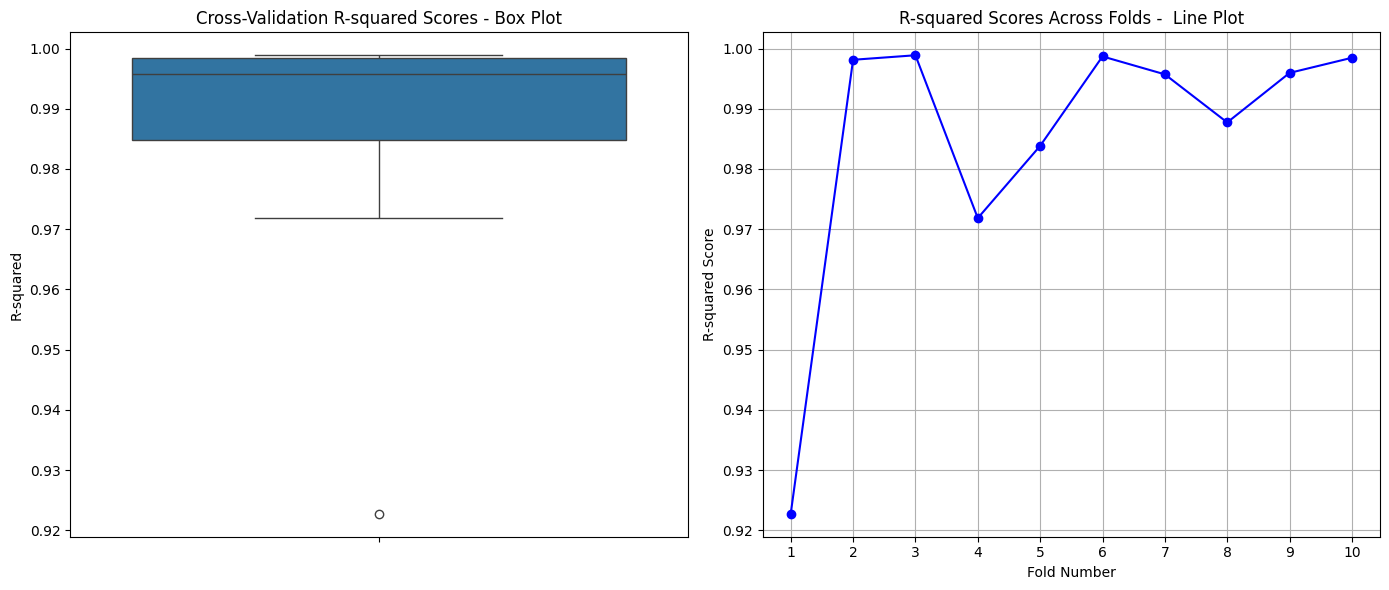

In [286]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Create a subplot for the box plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=scores)
plt.title('Cross-Validation R-squared Scores - Box Plot')
plt.ylabel('R-squared')

# Create a subplot for the line plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
plt.title('R-squared Scores Across Folds -  Line Plot')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.xticks(range(1, len(scores) + 1))
plt.grid(True)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

# 7. SupportVectorRegression 

In [287]:

# Initialize the model
svr_regressor = SVR(kernel='rbf')

# Fit the model to the training data
svr_regressor.fit(X_train, y_train)


# Making predictions on the Test set
y_pred = svr_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print("Mean Absolute Error:", mae)
print("R-squared:", r2)  # This gives an indication of the goodness of fit 



Mean Absolute Error: 28158.82356915569
R-squared: -0.0734298525895003


### Graphing to check the acuracy of SupportVectorRegression

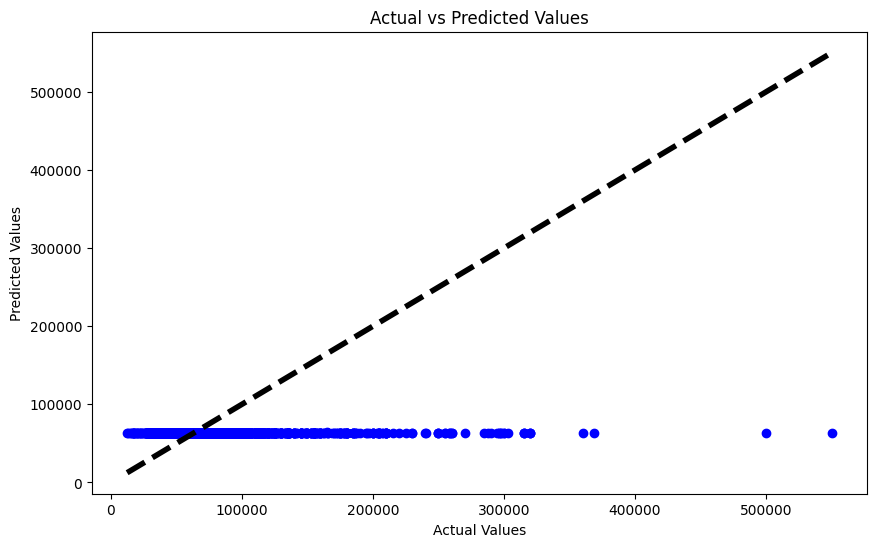

In [288]:
# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot of actual vs predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.show()

### Cross Validation using SupportVectorRegression

In [289]:
# Initialize the model
svr_regressor = SVR()

# Perform cross-validation
scores = cross_val_score(svr_regressor, X, y, cv=10, scoring='r2')  # cv is the number of folds; r2 for R-squared score

# Print R-squared scores for each fold
print("R-squared scores for each fold:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.4f}")  # Formats the score to 4 decimal places

# Printing the average R-squared score
average_score = scores.mean()
print(f"\nAverage R-squared across all folds: {average_score:.4f}")

R-squared scores for each fold:
Fold 1: -0.1628
Fold 2: -0.0948
Fold 3: -0.1027
Fold 4: -0.1168
Fold 5: -0.0670
Fold 6: -0.0323
Fold 7: -0.0378
Fold 8: -0.0626
Fold 9: -0.0536
Fold 10: -0.0889

Average R-squared across all folds: -0.0819


### Visualizing the Cross Validation score for SupportVectorRegression

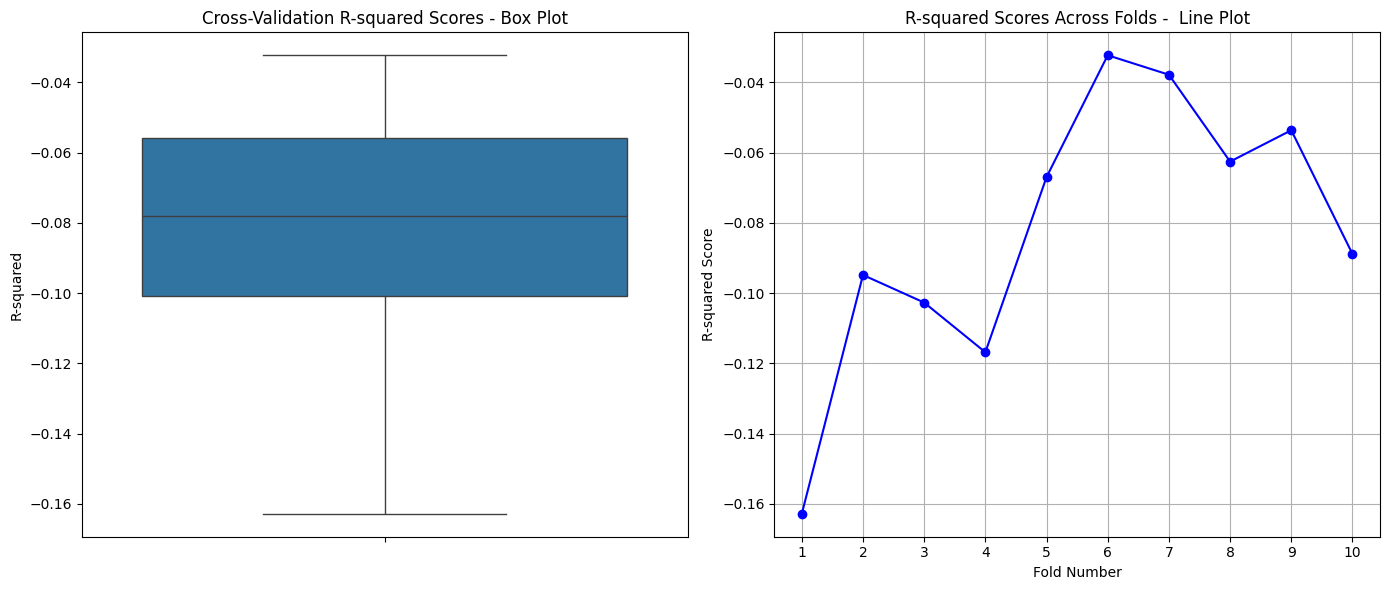

In [290]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Create a subplot for the box plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=scores)
plt.title('Cross-Validation R-squared Scores - Box Plot')
plt.ylabel('R-squared')

# Create a subplot for the line plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
plt.title('R-squared Scores Across Folds -  Line Plot')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.xticks(range(1, len(scores) + 1))
plt.grid(True)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

# 8. KNeighborsRegressor

In [291]:

# Initialize the model
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)


# Making predictions on the Test set
y_pred = knn_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print("Mean Absolute Error:", mae)
print("R-squared:", r2)  # This gives an indication of the goodness of fit 


Mean Absolute Error: 10834.694694694695
R-squared: 0.8580095224095262


### Graphing to check the acuracy of KNeighborsRegressor

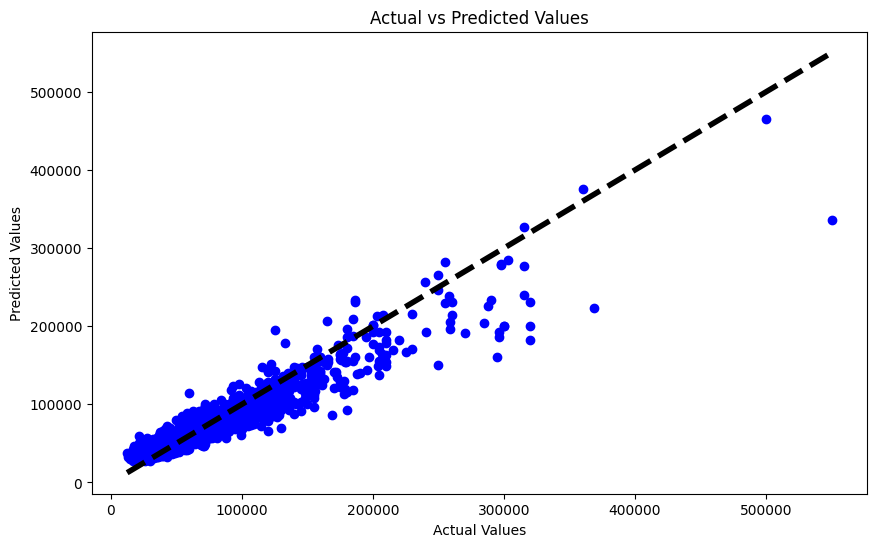

In [292]:
# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot of actual vs predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.show()

### Cross Validation using KNeighborsRegressor

In [293]:
# Initialize the model
knn_regressor = KNeighborsRegressor()

# Perform cross-validation
scores = cross_val_score(knn_regressor, X, y, cv=10, scoring='r2')  # cv is the number of folds; r2 for R-squared score

# Print R-squared scores for each fold
print("R-squared scores for each fold:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.4f}")  # Formats the score to 4 decimal places

# Printing the average R-squared score
average_score = scores.mean()
print(f"\nAverage R-squared across all folds: {average_score:.4f}")

R-squared scores for each fold:
Fold 1: 0.9373
Fold 2: 0.9645
Fold 3: 0.9793
Fold 4: 0.9306
Fold 5: 0.9408
Fold 6: 0.9395
Fold 7: 0.9712
Fold 8: 0.9735
Fold 9: 0.9797
Fold 10: 0.9629

Average R-squared across all folds: 0.9579


### Visualizing the Cross Validation score for KNeighborsRegressor

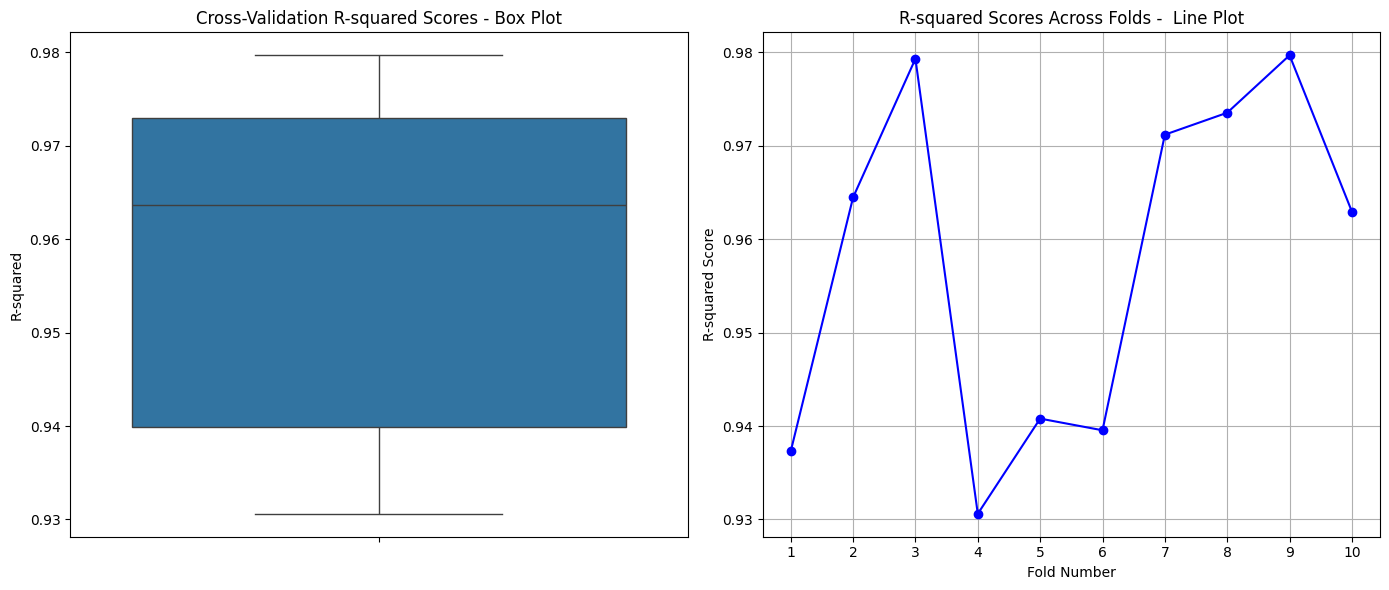

In [294]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Create a subplot for the box plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=scores)
plt.title('Cross-Validation R-squared Scores - Box Plot')
plt.ylabel('R-squared')

# Create a subplot for the line plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
plt.title('R-squared Scores Across Folds -  Line Plot')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.xticks(range(1, len(scores) + 1))
plt.grid(True)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

# 9 Neural Networks (MLP Regressor)

In [295]:
# Initialize the model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000, random_state=42)

# Fit the model to the training data
mlp_regressor.fit(X_train, y_train)

# Making predictions on the Test set
y_pred = mlp_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print("Mean Absolute Error:", mae)
print("R-squared:", r2)  # This gives an indication of the goodness of fit 

Mean Absolute Error: 6698.983579693957
R-squared: 0.9338519023498364


C:\Users\muniza.hashim\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Graphing to check the acuracy of Neural Networks (MLP Regressor)

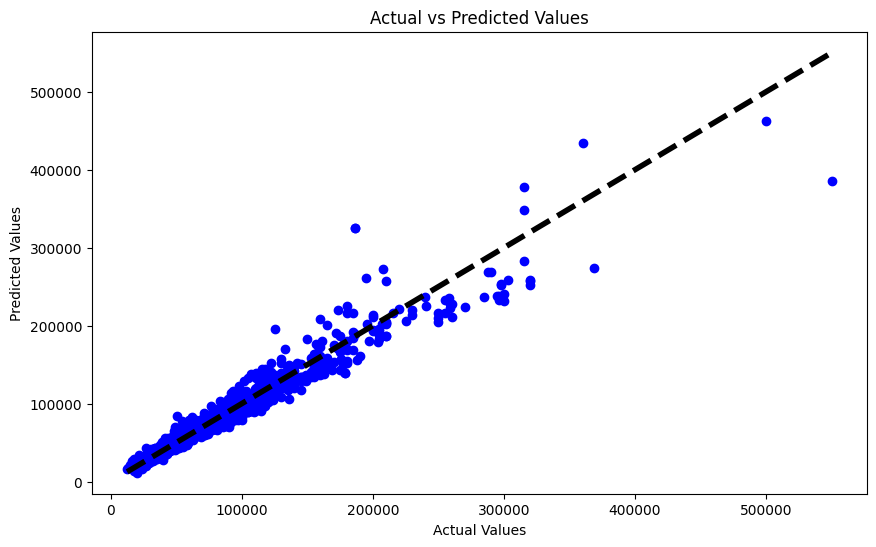

In [296]:
# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot of actual vs predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.show()

### Cross Validation using Neural Networks (MLP Regressor)

In [297]:
# Initialize the model
mlp_regressor = MLPRegressor()

# Perform cross-validation
scores = cross_val_score(mlp_regressor, X, y, cv=10, scoring='r2')  # cv is the number of folds; r2 for R-squared score

# Print R-squared scores for each fold
print("R-squared scores for each fold:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.4f}")  # Formats the score to 4 decimal places

# Printing the average R-squared score
average_score = scores.mean()
print(f"\nAverage R-squared across all folds: {average_score:.4f}")

C:\Users\muniza.hashim\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\muniza.hashim\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\muniza.hashim\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\muniza.hashim\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

R-squared scores for each fold:
Fold 1: 0.9486
Fold 2: 0.9618
Fold 3: 0.9703
Fold 4: 0.7763
Fold 5: 0.9058
Fold 6: 0.9594
Fold 7: 0.9466
Fold 8: 0.9662
Fold 9: 0.9683
Fold 10: 0.9714

Average R-squared across all folds: 0.9375


C:\Users\muniza.hashim\AppData\Roaming\Python\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Visualizing the Cross Validation score for Neural Networks (MLP Regressor)

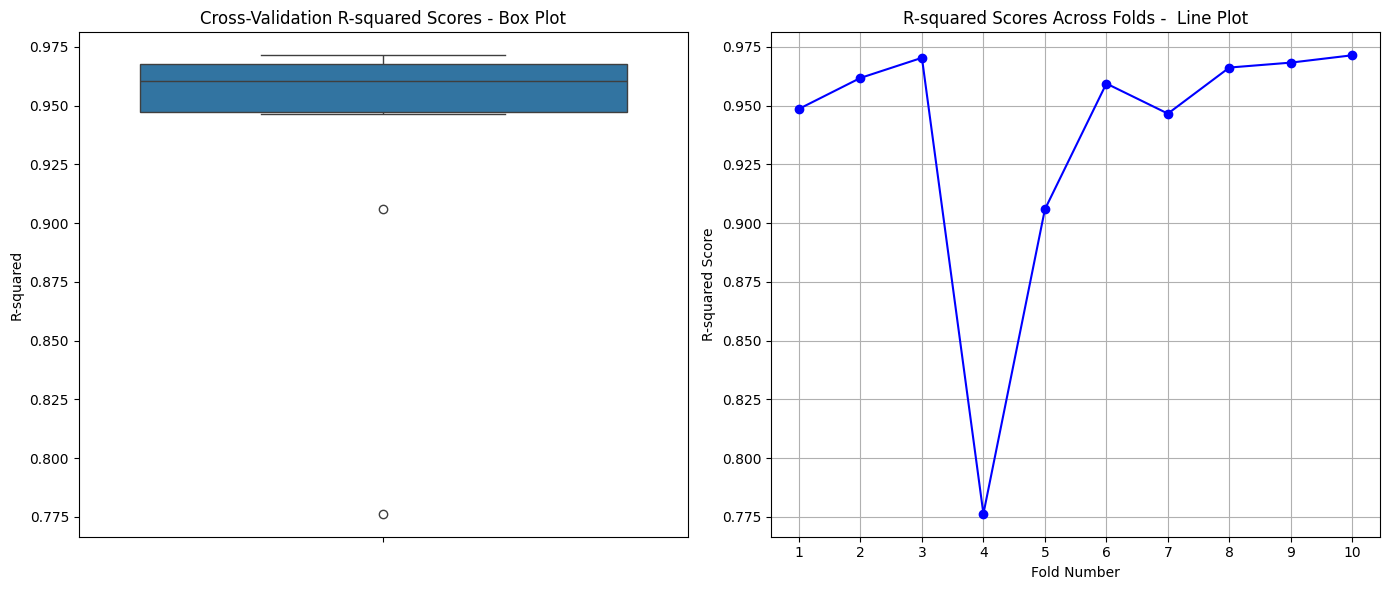

In [298]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Create a subplot for the box plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=scores)
plt.title('Cross-Validation R-squared Scores - Box Plot')
plt.ylabel('R-squared')

# Create a subplot for the line plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
plt.title('R-squared Scores Across Folds -  Line Plot')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.xticks(range(1, len(scores) + 1))
plt.grid(True)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

# 10. BayesianRidge

In [299]:
# Initialize the model
bayesian_regressor = BayesianRidge()

# Fit the model to the training data
bayesian_regressor.fit(X_train, y_train)


# Making predictions on the Test set
y_pred = bayesian_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print("Mean Absolute Error:", mae)
print("R-squared:", r2)  # This gives an indication of the goodness of fit 



Mean Absolute Error: 5747.341221182507
R-squared: 0.932551661426333


### Graphing to check the acuracy of BayesianRidge

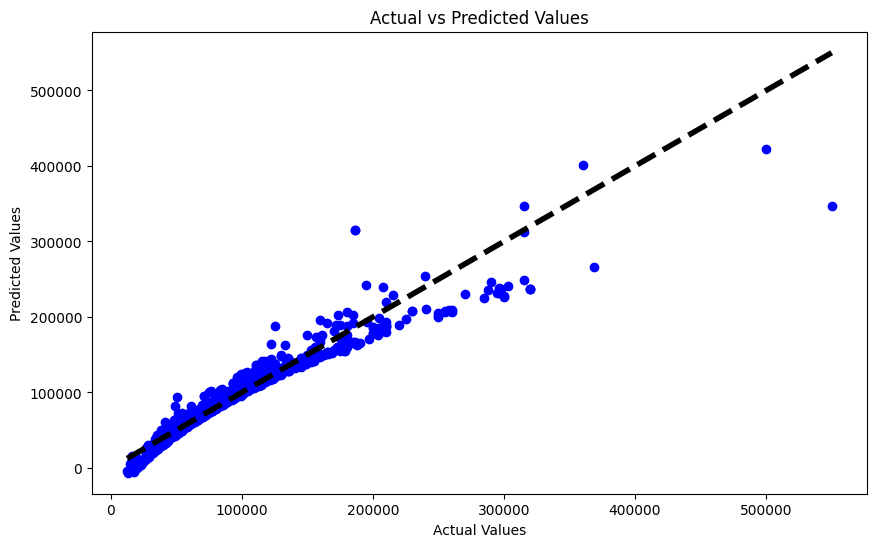

In [300]:
# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot of actual vs predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.show()

### Cross Validation using BayesianRidge

In [301]:
# Perform cross-validation
scores = cross_val_score(bayesian_regressor, X, y, cv=10, scoring='r2')  # cv is the number of folds; r2 for R-squared score

# Print R-squared scores for each fold
print("R-squared scores for each fold:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.4f}")  # Formats the score to 4 decimal places

# Printing the average R-squared score
average_score = scores.mean()
print(f"\nAverage R-squared across all folds: {average_score:.4f}")

R-squared scores for each fold:
Fold 1: 0.9486
Fold 2: 0.9482
Fold 3: 0.9475
Fold 4: 0.7226
Fold 5: 0.8833
Fold 6: 0.9399
Fold 7: 0.9348
Fold 8: 0.9612
Fold 9: 0.9606
Fold 10: 0.9600

Average R-squared across all folds: 0.9207


### Visualizing the Cross Validation score for BayesianRidge

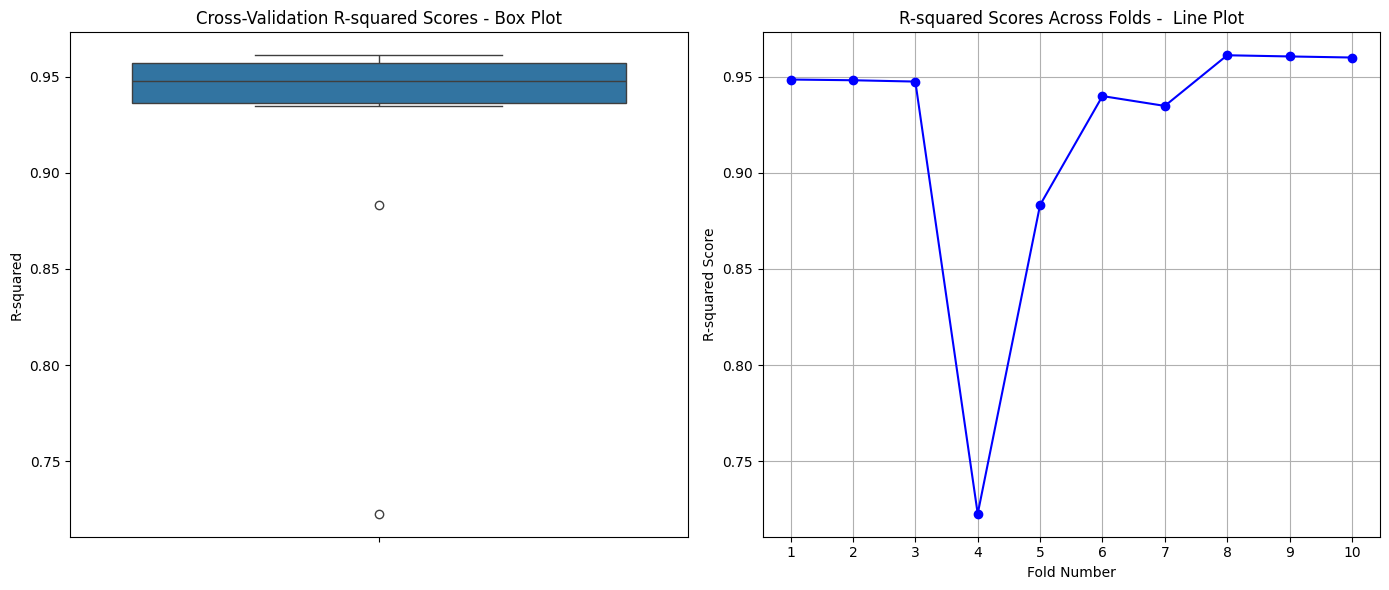

In [302]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Create a subplot for the box plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=scores)
plt.title('Cross-Validation R-squared Scores - Box Plot')
plt.ylabel('R-squared')

# Create a subplot for the line plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
plt.title('R-squared Scores Across Folds -  Line Plot')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.xticks(range(1, len(scores) + 1))
plt.grid(True)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()

# 11. Stochestic Gradient Regressor 

In [303]:
# Initialize the model
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)

# Fit the model to the training data
sgd_regressor.fit(X_train, y_train)


# Making predictions on the Test set
y_pred = sgd_regressor.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Calculate R-squared

print("Mean Absolute Error:", mae)
print("R-squared:", r2)  # This gives an indication of the goodness of fit 

Mean Absolute Error: 5991.775975422958
R-squared: 0.9374158297298137


## Graphing to check the acuracy of Stochestic Gradient Regressor

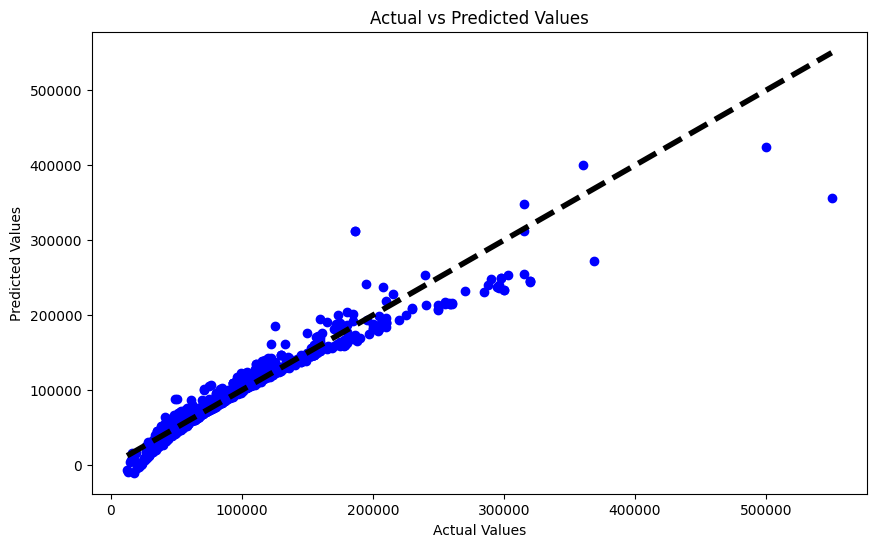

In [304]:
# Plotting y_test vs y_pred
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.scatter(y_test, y_pred, color='blue')  # Scatter plot of actual vs predicted values
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Line for perfect predictions
plt.show()

### Cross Validation using Stochestic Gradient Regressor

In [305]:
# Initialize the model
sgd_regressor = SGDRegressor()

# Perform cross-validation
scores = cross_val_score(sgd_regressor, X, y, cv=10, scoring='r2')  # cv is the number of folds; r2 for R-squared score

# Print R-squared scores for each fold
print("R-squared scores for each fold:")
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score:.4f}")  # Formats the score to 4 decimal places

# Printing the average R-squared score
average_score = scores.mean()
print(f"\nAverage R-squared across all folds: {average_score:.4f}")

R-squared scores for each fold:
Fold 1: -569020828097264680960.0000
Fold 2: -194169161529966264320.0000
Fold 3: -26445868643258531840.0000
Fold 4: -2429048436271843639296.0000
Fold 5: -3251612950540716605440.0000
Fold 6: -1562422955803400470528.0000
Fold 7: -804053596376343117824.0000
Fold 8: -2613818717936327065600.0000
Fold 9: -949753141010822594560.0000
Fold 10: -348322487356423602176.0000

Average R-squared across all folds: -1274866814356636565504.0000


### Visualizing the Cross Validation score for Stochestic Gradient Regressor

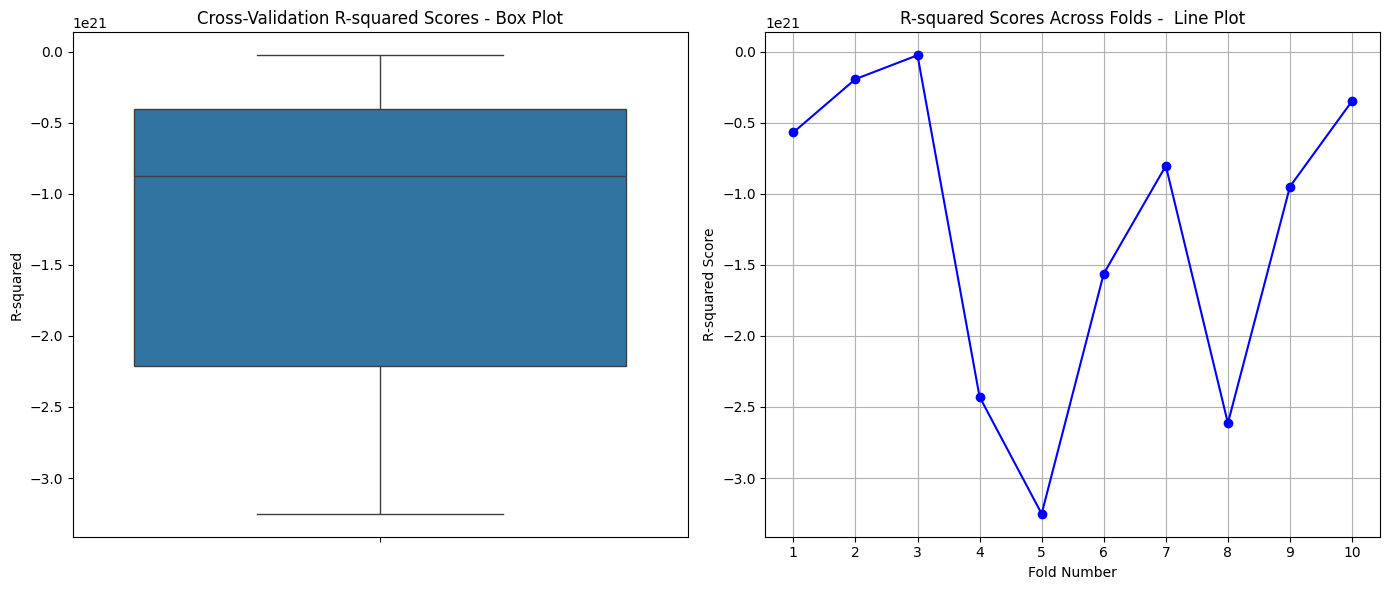

In [306]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Create a subplot for the box plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.boxplot(y=scores)
plt.title('Cross-Validation R-squared Scores - Box Plot')
plt.ylabel('R-squared')

# Create a subplot for the line plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='-', color='b')
plt.title('R-squared Scores Across Folds -  Line Plot')
plt.xlabel('Fold Number')
plt.ylabel('R-squared Score')
plt.xticks(range(1, len(scores) + 1))
plt.grid(True)

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plots
plt.show()